In [1]:
# Team Members

# Pooja Goyal
# Roshan Sah
# Sanjib Paudel
# Sourabh Yadav

In [2]:
!pip install os
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install imblearn
!pip install tensorflow
!pip install keras
!pip install ensemble
!pip install seaborn
!pip install joblib
!pip install six
!pip install pydot

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [3]:
# Import all libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np
from imblearn.over_sampling import SMOTE

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,Conv1D,Flatten,MaxPool2D

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

import seaborn as sb
import joblib

from sklearn.tree import export_graphviz
import six
import pydot
from sklearn import tree

In [4]:
# Load data from datasets
# Make sure these datasets are present in "datasets" folder. 
ar_data = pd.DataFrame(pd.read_csv('datasets/ar.csv'))
mc_data = pd.DataFrame(pd.read_csv('datasets/mc.csv'))
pc_data = pd.DataFrame(pd.read_csv('datasets/pc.csv'))
cm_data = pd.DataFrame(pd.read_csv('datasets/cm.csv'))
kc_data = pd.DataFrame(pd.read_csv('datasets/kc.csv'))
print('ar_data:', ar_data.shape)
print('mc_data:', mc_data.shape)
print('pc_data:', pc_data.shape)
print('cm_data:', cm_data.shape)
print('kc_data:', kc_data.shape)

ar_data: (428, 31)
mc_data: (9466, 40)
pc_data: (5589, 38)
cm_data: (498, 22)
kc_data: (2631, 22)


In [5]:
# Display AR datasets info
ar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                428 non-null    int64  
 1   total_loc                         428 non-null    int64  
 2   blank_loc                         428 non-null    int64  
 3   comment_loc                       428 non-null    int64  
 4   code_and_comment_loc              428 non-null    int64  
 5   executable_loc                    428 non-null    int64  
 6   unique_operands                   428 non-null    int64  
 7   unique_operators                  428 non-null    int64  
 8   total_operands                    428 non-null    int64  
 9   total_operators                   428 non-null    int64  
 10  halstead_vocabulary               428 non-null    int64  
 11  halstead_length                   428 non-null    int64  
 12  halstead

In [6]:
# Display MC datasets info
mc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9466 entries, 0 to 9465
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               9466 non-null   int64  
 1   LOC_BLANK                        9466 non-null   int64  
 2   BRANCH_COUNT                     9466 non-null   int64  
 3   CALL_PAIRS                       9466 non-null   int64  
 4   LOC_CODE_AND_COMMENT             9466 non-null   int64  
 5   LOC_COMMENTS                     9466 non-null   int64  
 6   CONDITION_COUNT                  9466 non-null   int64  
 7   CYCLOMATIC_COMPLEXITY            9466 non-null   int64  
 8   CYCLOMATIC_DENSITY               9466 non-null   float64
 9   DECISION_COUNT                   9466 non-null   int64  
 10  DESIGN_COMPLEXITY                9466 non-null   int64  
 11  DESIGN_DENSITY                   9466 non-null   int64  
 12  EDGE_COUNT          

In [7]:
# Move defects column to the end and display PC datasets info
pc_data.insert(len(pc_data.columns)-1, 'defects', pc_data.pop('defects'))
pc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5589 entries, 0 to 5588
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               5589 non-null   int64  
 1   BRANCH_COUNT                     5589 non-null   int64  
 2   CALL_PAIRS                       5589 non-null   int64  
 3   LOC_CODE_AND_COMMENT             5589 non-null   int64  
 4   LOC_COMMENTS                     5589 non-null   int64  
 5   CONDITION_COUNT                  5589 non-null   int64  
 6   CYCLOMATIC_COMPLEXITY            5589 non-null   int64  
 7   CYCLOMATIC_DENSITY               5589 non-null   float64
 8   DECISION_COUNT                   5589 non-null   int64  
 9   DECISION_DENSITY                 5589 non-null   float64
 10  DESIGN_COMPLEXITY                5589 non-null   int64  
 11  DESIGN_DENSITY                   5589 non-null   float64
 12  EDGE_COUNT          

In [8]:
# Display CM datasets info
cm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loc               498 non-null    float64
 1   vg                498 non-null    float64
 2   evg               498 non-null    float64
 3   ivg               498 non-null    float64
 4   n                 498 non-null    float64
 5   v                 498 non-null    float64
 6   l                 498 non-null    float64
 7   d                 498 non-null    float64
 8   i                 498 non-null    float64
 9   e                 498 non-null    float64
 10  b                 498 non-null    float64
 11  t                 498 non-null    float64
 12  lOCode            498 non-null    int64  
 13  lOComment         498 non-null    int64  
 14  lOBlank           498 non-null    int64  
 15  lOCodeAndComment  498 non-null    int64  
 16  uniq_Op           498 non-null    float64
 1

In [9]:
# Display KC datasets info
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2631 entries, 0 to 2630
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loc               2631 non-null   float64
 1   vg                2631 non-null   float64
 2   evg               2631 non-null   float64
 3   ivg               2631 non-null   float64
 4   n                 2631 non-null   float64
 5   v                 2631 non-null   float64
 6   l                 2631 non-null   float64
 7   d                 2631 non-null   float64
 8   i                 2631 non-null   float64
 9   e                 2631 non-null   float64
 10  b                 2631 non-null   float64
 11  t                 2631 non-null   float64
 12  lOCode            2631 non-null   int64  
 13  lOComment         2631 non-null   int64  
 14  lOBlank           2631 non-null   int64  
 15  lOCodeAndComment  2631 non-null   int64  
 16  uniq_Op           2631 non-null   float64


In [10]:
# Check if any value is null from datasets above
def checkIfValueIsNull(data):
    isAnyValueNull = data.isnull().values.any()
    return isAnyValueNull

print('is Any Value Null for ar_data: ', checkIfValueIsNull(ar_data))
print('is Any Value Null for mc_data: ', checkIfValueIsNull(mc_data))
print('is Any Value Null for pc_data: ', checkIfValueIsNull(pc_data))
print('is Any Value Null for cm_data: ', checkIfValueIsNull(cm_data))
print('is Any Value Null for kc_data: ', checkIfValueIsNull(kc_data))


is Any Value Null for ar_data:  False
is Any Value Null for mc_data:  False
is Any Value Null for pc_data:  False
is Any Value Null for cm_data:  False
is Any Value Null for kc_data:  False


In [11]:
# Create images and trained folder if needed
imagesPath = 'images/'
trainedPath = 'trained/'
isImagesPathExist = os.path.exists(imagesPath)
isTrainedPathExist = os.path.exists(trainedPath)
if not isImagesPathExist:
    os.makedirs(imagesPath)
if not isTrainedPathExist:
    os.makedirs(trainedPath)

In [12]:
# Pre-processing Data
def pre_process_data(data):
    if checkIfValueIsNull(data):
        data.isnull().sum().sum()
        print("Total number of Null values", data)
        data = data.dropna()
    if data.shape[0] > 0:
        # Check data correlation before pre-processing
        data_corr = data.corr()
        ax = sb.heatmap(data_corr, linewidths=0.1, cmap="YlGnBu")
        ax.set_title('Before Correlation')
        plt.show()
        
        # Drop features which have less than 0.8 correlation
        correlated_features = set()
        correlation_matrix = data.corr()
        for i in range(len(correlation_matrix.columns)):
            for j in range(i):
                if abs(correlation_matrix.iloc[i, j]) > 0.8:
                    colname = correlation_matrix.columns[i]
                    correlated_features.add(colname)

        data.drop(labels=correlated_features, axis=1, inplace=True)
        
        # Check data correlation after pre-processing
        data_corr = data.corr()
        ax1 = sb.heatmap(data_corr, linewidths=0.1, cmap="YlGnBu")
        ax1.set_title('After Correlation')
        plt.show()
        
        # Add all columns except "defects" column in data_X
        # Add "defects" columns in data_y
        data_X = data.drop(['defects'], axis=1)
        data_y = data['defects']
        data_y = data_y.astype('int')
        
        # Checking for Data Imbalance
        ax2 = sb.countplot(data['defects'])
        ax2.set_title('Data Imbalance')
        plt.show()
        
        return data, data_X, data_y
    else:
        return False

In [13]:
# Split data for training and testing
# Training 90%, Testing 10%
def split_data_train_test(data_X, data_y):
    X_train1, X_test, y_train1, y_test = train_test_split(data_X, data_y, test_size = 0.1, random_state=1)

    sm = SMOTE(k_neighbors=3)
    X_train2, y_train2 = sm.fit_resample(X_train1, y_train1)

    X_train, X_val, y_train, y_val = train_test_split(X_train2, y_train2, test_size = .1, random_state=1)
    combined_training_data = X_train.copy()
    combined_training_data['defects'] = y_train
    
    ax = sb.countplot(combined_training_data['defects'])
    ax.set_title('Defects count')
    plt.show()
    return combined_training_data, X_train1, X_train2, X_train, X_test, X_val, y_train1, y_train2, y_train, y_test, y_val

In [14]:
# Plot the graph for Accuracy and Loss
def plot_loss_accuracy_graph(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


In [15]:
# Predict Test Data
def predict_test_tata(model, X_val, y_val):
    # Predict the output of test data from trained model
    y_pred = model.predict(X_val)
    y_pred = (y_pred > 0.5)
    y_pred = pd.DataFrame(y_pred, columns=['defects'])

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    ax = sb.heatmap(cm, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels for '+str(model)+' \n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    print("Accuracy of Model: ", accuracy_score(y_val, y_pred))
    # Calculate the accuracy between actual output and predicted output
    return accuracy_score(y_val, y_pred)

In [16]:
dotfile = six.StringIO()

def save_graph(model, filename):
    for tree_in_forest in model.estimators_:
        export_graphviz(tree_in_forest,out_file=filename+'.dot',
        feature_names=data_X.columns,
        filled=True,
        rounded=True)
        (graph,) = pydot.graph_from_dot_file(filename+'.dot')
        graph.write_png('images/'+filename+'.png')

In [17]:
# Base Models
#   Neural Network
#   Random Forest
#   Support Vector Machine
#   Convolutional Nueral Network

In [18]:
# model train with neural network
# Defination: Neural networks reflect the behavior of the human brain, allowing computer programs to recognize patterns and solve common problems in the fields of AI, machine learning, and deep learning.
def neural_network(filename, X_val, y_val):
    global history
    model = Sequential()
    # First hidden layer
    model.add(Dense(units = 16, activation = 'relu', input_dim = len(data_X.columns)))
    # Second hidden layer
    model.add(Dense(units = 8, activation = 'relu'))
    # Third hidden layer
    model.add(Dense(units = 4, activation = 'relu'))
    # Output layer
    model.add(Dense(units = 1, activation = 'sigmoid'))
    
    
    # Compiling Artificial Neural Network
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    # Fitting the ANN to the Training set
    history = model.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_data=(X_val, y_val))
    
    # Save the trained model
    # make sure the "trained" folder is present
    model.save(
        "trained/"+filename+".h5",
        overwrite=True,
        include_optimizer=True,
        save_format=None,
        signatures=None,
        options=None,
        save_traces=True,
    )

In [19]:
# Predict test result of neural network
def test_nn_model(filename, X_val, y_val):
    model = keras.models.load_model("trained/"+filename+".h5") # Load saved model
    print('Test Accuracy or Neural Network', predict_test_tata(model, X_val, y_val))

In [20]:
# model train with Random Forest
# Defination: A random forest is a supervised machine learning algorithm that is constructed from decision tree algorithms
def random_forest(filename):
    model = RandomForestClassifier(n_estimators=10, max_depth=5,random_state=0)
    model.fit(X_train, y_train)
    
    # Save the trained model
    # make sure the "trained" folder is present
    joblib.dump(model, "trained/"+filename+".h5")
    
    # Save the RR graph
    # make sure the "images" folder is present
    save_graph(model, filename)

In [21]:
# Display the result of random forest
def display_tree(filename):
    img = image.imread("images/"+filename+".png")
    plt.figure(figsize=(20, 20))
    plt.imshow(img)
    plt.show()

In [22]:
# Predict test result of random forest
def test_rf_model(filename, X_val, y_val):
    model = joblib.load("trained/"+filename+".h5") # Load saved model
    print('Test Accuracy of Random Forest', predict_test_tata(model, X_val, y_val))

In [23]:
# model train with Support Vector Machine
# Defination: Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.
def svm(filename):
    model = SVC(gamma='auto')
    model.fit(X_train, y_train)
    joblib.dump(model, "trained/"+filename+".h5")

In [24]:
# Predict test result of svc
def test_svm_model(filename, X_val, y_val):
    model = joblib.load("trained/"+filename+".h5") # Load saved model
    print('Test Accuracy of SVC', predict_test_tata(model, X_val, y_val))

In [25]:
# model train with Convolutional Neural Network
# Defination: convolutional neural network (CNN/ConvNet) is a class of deep neural networks, most commonly applied to analyze visual imagery
def cnn(filename, X_val, y_val):
    global X_val1
    global history
    X_train_matrix = X_train.values
    X_val_matrix = X_val.values
    y_train_matrix = y_train.values
    y_val_matrix = y_val.values
    
    y_train_series = y_train
    y_val_series = y_val
    
    img_rows, img_cols = 1,len(data_X.columns)
    
    X_train1 = X_train_matrix.reshape(X_train_matrix.shape[0], img_rows, img_cols, 1)
    X_val1 = X_val_matrix.reshape(X_val_matrix.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

    model = Sequential()
    # Model layers
    model.add(Conv2D(64, kernel_size=1, activation='relu',input_shape=input_shape))
    model.add(Conv2D(32, kernel_size=1, activation='relu'))
    model.add(Conv2D(16, kernel_size=1, activation='relu'))
    model.add(Flatten())
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model using accuracy to measure model performance
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # train the model
    history = model.fit(X_train1, y_train_matrix, batch_size=32, epochs=100, validation_data=(X_val1, y_val_matrix))
    
    # Save the trained model
    # make sure the "trained" folder is present
    model.save(
        "trained/"+filename+".h5",
        overwrite=True,
        include_optimizer=True,
        save_format=None,
        signatures=None,
        options=None,
        save_traces=True,
    )

In [26]:
# Predict test result of convolutional neural network
# Load saved model
def test_cnn_model(filename, X_Val, y_val):
    model = keras.models.load_model("trained/"+filename+".h5") # Load saved model
    print('Test Accuracy of CNN', predict_test_tata(model, X_Val, y_val))

In [27]:
# Prepare trained models for ensemble learning
def prepare_for_ensemble_learning(filetype, X_val, X_test, y_val, y_test):
    svm_model = joblib.load("trained/"+filetype+"_svm.h5")
    rf_model = joblib.load("trained/"+filetype+"_rf.h5")
    nn_model = keras.models.load_model("trained/"+filetype+"_nn.h5")
    cnn_model = keras.models.load_model("trained/"+filetype+"_cnn.h5")
    
    svm_val_result, svm_test_result = print_accuracy(filetype.upper()+' Dataset', svm_model, 'svm_model', X_val, X_test, y_val, y_test)
    rf_val_result, rf_test_result = print_accuracy(filetype.upper()+' Dataset', rf_model, 'rf_model', X_val, X_test, y_val, y_test)
    nn_val_result, nn_test_result = print_accuracy(filetype.upper()+' Dataset', nn_model, 'nn_model', X_val, X_test, y_val, y_test)
    cnn_val_result, cnn_test_result = print_accuracy(filetype.upper()+' Dataset', cnn_model, 'cnn_model',  X_val, X_test, y_val, y_test)

    new_val_set_X = pd.concat([
        svm_val_result['val_predict'],
        rf_val_result['val_predict'],
        nn_val_result['val_predict'],
        cnn_val_result['val_predict'],
    ], axis=1)
    new_val_set_X_matrix = new_val_set_X.values
    new_val_set_y_matrix = svm_val_result['val_actual'].values

    new_test_set_X = pd.concat([
        svm_test_result['test_predict'],
        rf_test_result['test_predict'],
        nn_test_result['test_predict'],
        cnn_test_result['test_predict']
    ], axis=1)
    new_test_set_X_matrix = new_test_set_X.values
    new_test_set_y_matrix = svm_test_result['test_actual'].values
    return new_val_set_X_matrix, new_val_set_y_matrix, new_test_set_X_matrix, new_test_set_y_matrix


In [28]:
# print accuracy of svm, random forest, nn, cnn
def print_accuracy(filetype, model, modelType, X_val, X_test, y_val, y_test): 
    if (modelType == 'nn_model'):
        y_pred_on_val = model.predict(X_val) > 0.5
        y_pred_on_test = model.predict(X_test) > 0.5
    elif (modelType == 'cnn_model'):
        X_val_matrix = X_val.values
        X_val1 = X_val_matrix.reshape(X_val_matrix.shape[0], 1, len(X_val.columns), 1)
        y_pred_on_val = model.predict(X_val1) > 0.5
        X_test_matrix = X_test.values
        X_test1 = X_test_matrix.reshape(X_test_matrix.shape[0], 1, len(X_test.columns), 1)
        y_pred_on_test = model.predict(X_test1) > 0.5
    else:
        y_pred_on_val = model.predict(X_val)
        y_pred_on_test = model.predict(X_test)
        
    print('*****************', filetype, model, '*********************')   
    print('*****Validation Set*****')
    print('Accuracy:',balanced_accuracy_score(y_val,y_pred_on_val))
    print('Avg Precision:', average_precision_score(y_val,y_pred_on_val))
    print('Precision:', precision_score(y_val,y_pred_on_val))
    print('Recall:', recall_score(y_val, y_pred_on_val))
    print('************************')
    print('*****Test Set*****')
    print('Accuracy:',balanced_accuracy_score(y_test,y_pred_on_test))
    print('Avg Precision:', average_precision_score(y_test,y_pred_on_test))
    print('Precision:', precision_score(y_test,y_pred_on_test))
    print('Recall:', recall_score(y_test, y_pred_on_test))
    print('************************')
    print('')
    y_pred_on_val_df = pd.DataFrame(y_pred_on_val, columns=['defects1'])
    y_pred_on_test_df = pd.DataFrame(y_pred_on_test, columns=['defects1'])
    val_result = pd.concat([y_val.reset_index(drop=True), y_pred_on_val_df['defects1']],axis=1)
    val_result = val_result.rename(columns={'defects':'val_actual', 'defects1':'val_predict'})
    test_result = pd.concat([y_test.reset_index(drop=True),y_pred_on_test_df['defects1']],axis=1)
    test_result = test_result.rename(columns={'defects':'test_actual','defects1':'test_predict'})
    return val_result, test_result

In [29]:
# Emsemble Model training
#   Logistic Regression
#   Ada Boosting
#   Bagging

In [30]:
# Model train with Ensemble Logistic Regression
# Defination: Logistic regression is a process of modeling the probability of a discrete outcome given an input variable
def ensemble_logistic_regression_train(filetype):
    model = LogisticRegression(random_state=0)
    model.fit(new_val_set_X_matrix, new_val_set_y_matrix)
    joblib.dump(model, "trained/"+filetype+"_logistic_regression.h5")

In [31]:
# Model train with Ensemble Ada Boosting
# Defination: Boosting is an ensemble learning method that combines a set of weak learners into a strong learner to minimize training errors.
def ensemble_ada_boost_train(filetype):
    model = AdaBoostClassifier(n_estimators=100, random_state=0, base_estimator=SVC(probability=True, kernel='linear'))
    model.fit(new_val_set_X_matrix, new_val_set_y_matrix)
    joblib.dump(model, "trained/"+filetype+"_ada_boost.h5")

In [32]:
# Model train with Ensemble Bagging
# Defination: Bagging, also known as Bootstrap aggregating, is an ensemble learning technique that helps to improve the performance and accuracy of machine learning algorithms. It is used to deal with bias-variance trade-offs and reduces the variance of a prediction model
def ensemble_bagging_train(filetype):
    model = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0)
    model.fit(new_val_set_X_matrix, new_val_set_y_matrix)
    joblib.dump(model, "trained/"+filetype+"_bagging.h5")

In [33]:
# Test Ensemble Logistic Regression
def ensemble_logistic_regresstion_test(filetype, new_test_set_X_matrix, y_test):
    lr = joblib.load("trained/"+filetype+"_logistic_regression.h5")
    prediction = lr.predict(new_test_set_X_matrix)
    print(filetype.upper()+' Logistic Regression Accuracy:',accuracy_score(y_test.values, prediction))

In [34]:
# Test Ensemble Ada Boosting
def ensemble_ada_boost_test(filetype, new_test_set_X_matrix, y_test):
    lr = joblib.load("trained/"+filetype+"_ada_boost.h5")
    prediction = lr.predict(new_test_set_X_matrix)
    print(filetype.upper()+' Ada Boost Accuracy:',accuracy_score(y_test.values, prediction))

In [35]:
# Test Ensemble Bagging
def ensemble_bagging_test(filetype, new_test_set_X_matrix, y_test):
    lr = joblib.load("trained/"+filetype+"_bagging.h5")
    prediction = lr.predict(new_test_set_X_matrix)
    print(filetype.upper()+' Bagging Accuracy:',accuracy_score(y_test.values, prediction))

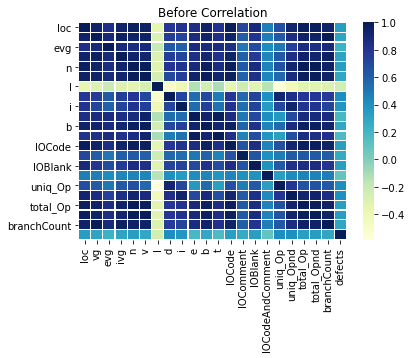

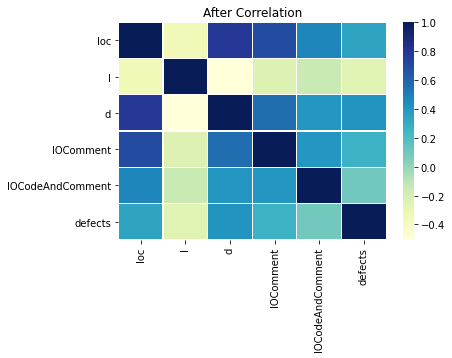

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


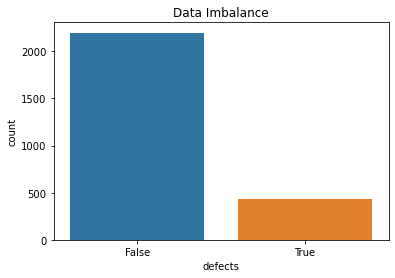

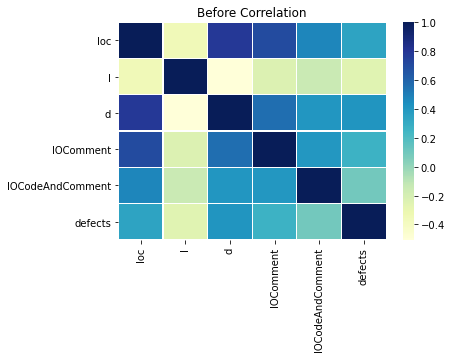

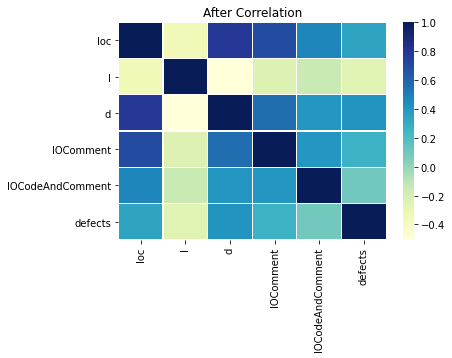

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


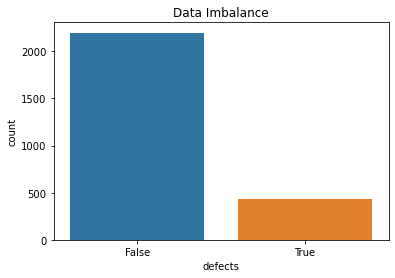

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


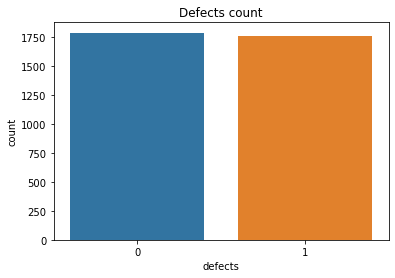

In [36]:
# Datasets KC
# Step 1: Preprocess and Split for Train/Test. 
# Display Before and After Correlation Graph
# Display data imbalance graph
# Display data balanced graph after preprocessing
if pre_process_data(kc_data):
    data, data_X, data_y = pre_process_data(kc_data)
    combined_training_data, X_train1, X_train2, X_train, kc_X_test, kc_X_val, y_train1, y_train2, y_train, kc_y_test, kc_y_val = split_data_train_test(data_X, data_y)
else:
    print('No Data available for training')

In [37]:
# Step 2: Model train with Neural Network
neural_network('kc_nn', kc_X_val, kc_y_val)

Epoch 1/100
111/111 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.6410 - val_loss: 0.6089 - val_accuracy: 0.7513
Epoch 2/100
111/111 [==============================] - 0s 974us/step - loss: 0.6112 - accuracy: 0.7284 - val_loss: 0.5762 - val_accuracy: 0.7563
Epoch 3/100
111/111 [==============================] - 0s 979us/step - loss: 0.5984 - accuracy: 0.7465 - val_loss: 0.5831 - val_accuracy: 0.7360
Epoch 4/100
111/111 [==============================] - 0s 989us/step - loss: 0.5914 - accuracy: 0.7465 - val_loss: 0.5690 - val_accuracy: 0.7360
Epoch 5/100
111/111 [==============================] - 0s 977us/step - loss: 0.5836 - accuracy: 0.7411 - val_loss: 0.5691 - val_accuracy: 0.7411
Epoch 6/100
111/111 [==============================] - 0s 957us/step - loss: 0.5756 - accuracy: 0.7434 - val_loss: 0.5651 - val_accuracy: 0.7487
Epoch 7/100
111/111 [==============================] - 0s 992us/step - loss: 0.5696 - accuracy: 0.7389 - val_loss: 0.5642 - val_accu

111/111 [==============================] - 0s 1ms/step - loss: 0.5055 - accuracy: 0.7578 - val_loss: 0.5104 - val_accuracy: 0.7386
Epoch 58/100
111/111 [==============================] - 0s 925us/step - loss: 0.5065 - accuracy: 0.7631 - val_loss: 0.5012 - val_accuracy: 0.7487
Epoch 59/100
111/111 [==============================] - 0s 967us/step - loss: 0.5064 - accuracy: 0.7603 - val_loss: 0.4999 - val_accuracy: 0.7640
Epoch 60/100
111/111 [==============================] - 0s 995us/step - loss: 0.5033 - accuracy: 0.7535 - val_loss: 0.5050 - val_accuracy: 0.7563
Epoch 61/100
111/111 [==============================] - 0s 989us/step - loss: 0.5065 - accuracy: 0.7623 - val_loss: 0.5029 - val_accuracy: 0.7487
Epoch 62/100
111/111 [==============================] - 0s 991us/step - loss: 0.5050 - accuracy: 0.7518 - val_loss: 0.5161 - val_accuracy: 0.7310
Epoch 63/100
111/111 [==============================] - 0s 968us/step - loss: 0.5060 - accuracy: 0.7586 - val_loss: 0.5056 - val_accuracy: 

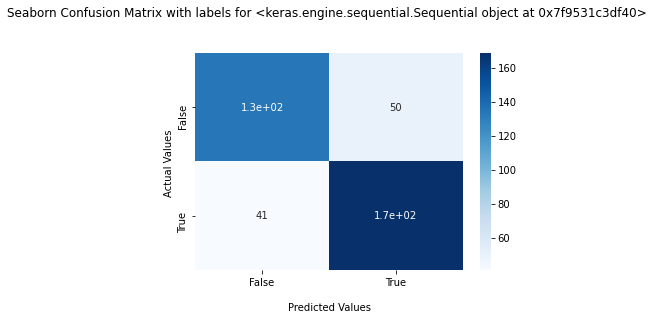

Accuracy of Model:  0.7690355329949239
Test Accuracy or Neural Network 0.7690355329949239


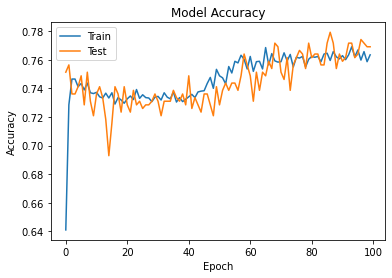

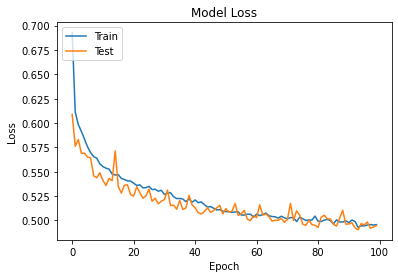

In [38]:
# Step 3: 
# Display Confusion Matrix
# Display Test Result of NN
# Display Model Accuracy graph
# Display Model Loss graph
kc_nn_history = history
test_nn_model('kc_nn', kc_X_val, kc_y_val)
plot_loss_accuracy_graph(kc_nn_history)

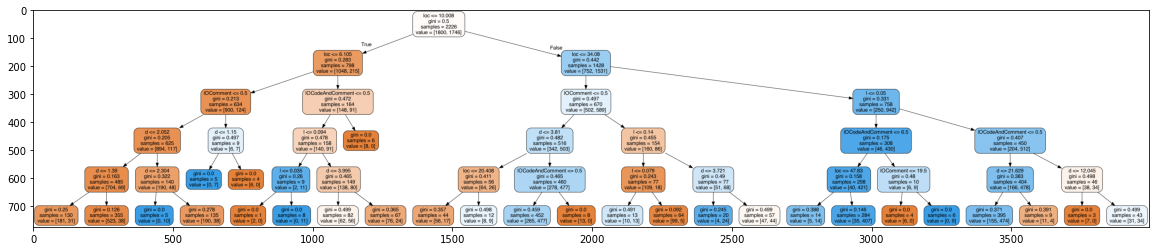

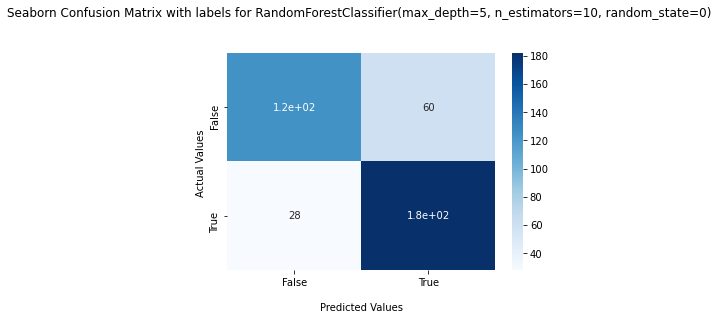

Accuracy of Model:  0.7766497461928934
Test Accuracy of Random Forest 0.7766497461928934


In [39]:
# Step 4:
# Model train with Random Forest
# Display hierarchical graph
# Display Confusion Matrix
# Test Result of RF
random_forest('kc_rf')
display_tree('kc_rf')
test_rf_model('kc_rf', kc_X_val, kc_y_val)

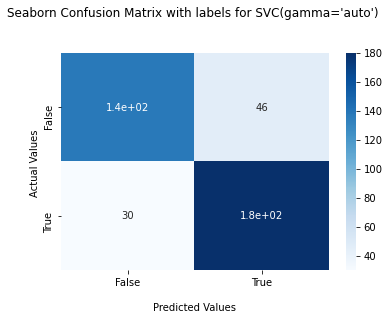

Accuracy of Model:  0.8071065989847716
Test Accuracy of SVC 0.8071065989847716


In [40]:
# Step 5:
# Model train with Support Vector Machine
# Display Confusion Matrix
# Display Test Result of SVM
svm('kc_svm')
test_svm_model('kc_svm', kc_X_val, kc_y_val)

In [41]:
# Step 6: Model train with Convolutional Neural Network
cnn('kc_cnn', kc_X_val, kc_y_val)

Epoch 1/100
111/111 [==============================] - 1s 3ms/step - loss: 0.6088 - accuracy: 0.7011 - val_loss: 0.5769 - val_accuracy: 0.7157
Epoch 2/100
111/111 [==============================] - 0s 2ms/step - loss: 0.5631 - accuracy: 0.7081 - val_loss: 0.5383 - val_accuracy: 0.7208
Epoch 3/100
111/111 [==============================] - 0s 2ms/step - loss: 0.5407 - accuracy: 0.7211 - val_loss: 0.5572 - val_accuracy: 0.7132
Epoch 4/100
111/111 [==============================] - 0s 2ms/step - loss: 0.5403 - accuracy: 0.7256 - val_loss: 0.5105 - val_accuracy: 0.7437
Epoch 5/100
111/111 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.7327 - val_loss: 0.5040 - val_accuracy: 0.7437
Epoch 6/100
111/111 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.7312 - val_loss: 0.4950 - val_accuracy: 0.7386
Epoch 7/100
111/111 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.7369 - val_loss: 0.5250 - val_accuracy: 0.7183

Epoch 58/100
111/111 [==============================] - 0s 2ms/step - loss: 0.5090 - accuracy: 0.7439 - val_loss: 0.4918 - val_accuracy: 0.7665
Epoch 59/100
111/111 [==============================] - 0s 2ms/step - loss: 0.5075 - accuracy: 0.7482 - val_loss: 0.4911 - val_accuracy: 0.7614
Epoch 60/100
111/111 [==============================] - 0s 2ms/step - loss: 0.5079 - accuracy: 0.7408 - val_loss: 0.4924 - val_accuracy: 0.7589
Epoch 61/100
111/111 [==============================] - 0s 2ms/step - loss: 0.5075 - accuracy: 0.7453 - val_loss: 0.5116 - val_accuracy: 0.7665
Epoch 62/100
111/111 [==============================] - 0s 2ms/step - loss: 0.5084 - accuracy: 0.7476 - val_loss: 0.4898 - val_accuracy: 0.7614
Epoch 63/100
111/111 [==============================] - 0s 2ms/step - loss: 0.5084 - accuracy: 0.7451 - val_loss: 0.4890 - val_accuracy: 0.7589
Epoch 64/100
111/111 [==============================] - 0s 2ms/step - loss: 0.5063 - accuracy: 0.7465 - val_loss: 0.4917 - val_accuracy:

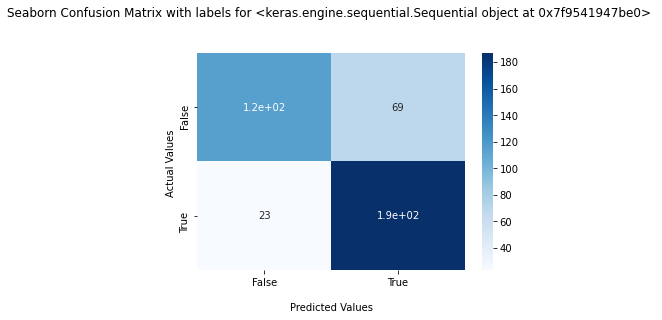

Accuracy of Model:  0.766497461928934
Test Accuracy of CNN 0.766497461928934


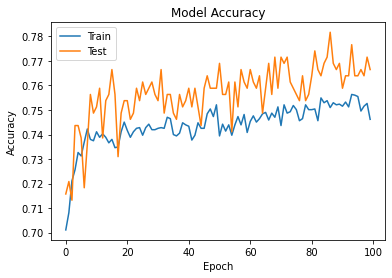

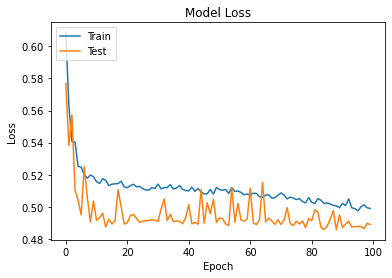

In [42]:
# Step 7: 
# Display Confusion Matrix
# Display Test Result of CNN
# Display Model Accuracy graph
# Display Model Loss graph
kc_X_Val1 = X_val1
kc_cnn_history = history
test_cnn_model('kc_cnn', kc_X_Val1, kc_y_val)
plot_loss_accuracy_graph(kc_cnn_history)

In [43]:
# Step 8:
# Model train with Logistic Regression
# Model train with Ada Boosting
# Model Train with Bagging

# Step 9:
# Test Result for Logistic Regression
# Test Result for Ada Boosting
# Test Result for Bagging
# Ensemble Learning for KC Datasets
new_val_set_X_matrix, new_val_set_y_matrix, new_test_set_X_matrix, new_test_set_y_matrix = prepare_for_ensemble_learning('kc', kc_X_val, kc_X_test, kc_y_val, kc_y_test)
# Ensemble Training
print("***********************************************************")
ensemble_logistic_regression_train('kc')
ensemble_ada_boost_train('kc')
ensemble_bagging_train('kc')
print("***********************************************************")

# Ensemble Testing
print("***********************************************************")
ensemble_logistic_regresstion_test('kc', new_test_set_X_matrix, kc_y_test)
ensemble_ada_boost_test('kc', new_test_set_X_matrix, kc_y_test)
ensemble_bagging_test('kc', new_test_set_X_matrix, kc_y_test)
print("***********************************************************")

***************** KC Dataset SVC(gamma='auto') *********************
*****Validation Set*****
Accuracy: 0.8035714285714286
Avg Precision: 0.7588222836863958
Precision: 0.7964601769911505
Recall: 0.8571428571428571
************************
*****Test Set*****
Accuracy: 0.6695906432748538
Avg Precision: 0.2130832130832131
Precision: 0.2619047619047619
Recall: 0.6111111111111112
************************

***************** KC Dataset RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0) *********************
*****Validation Set*****
Accuracy: 0.7702898550724637
Avg Precision: 0.7228566234565312
Precision: 0.7520661157024794
Recall: 0.8666666666666667
************************
*****Test Set*****
Accuracy: 0.7551169590643275
Avg Precision: 0.2594298844298844
Precision: 0.27927927927927926
Recall: 0.8611111111111112
************************

***************** KC Dataset <keras.engine.sequential.Sequential object at 0x7f94f09912e0> *********************
*****Validation Set*****
Ac

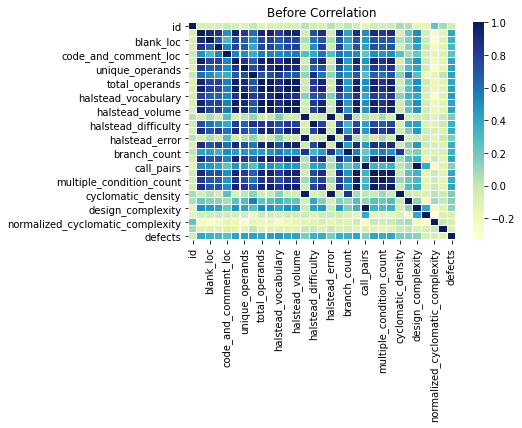

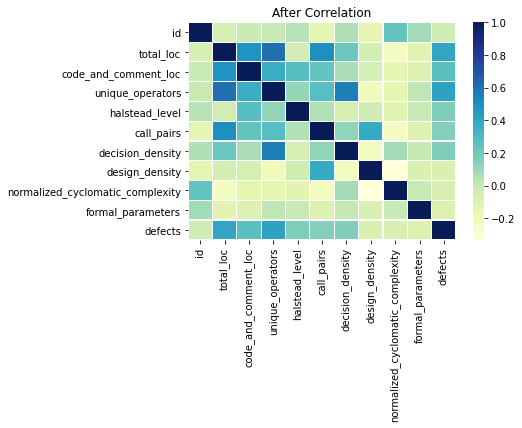

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


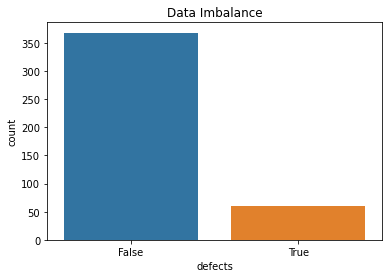

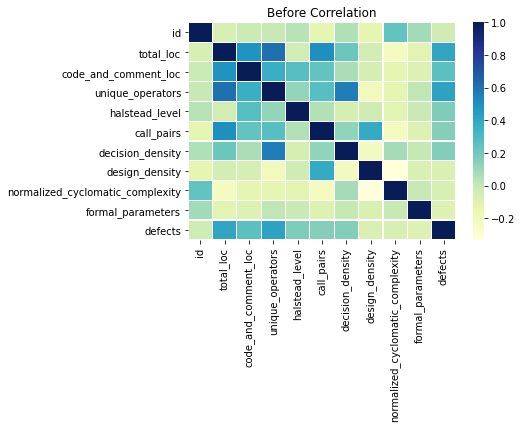

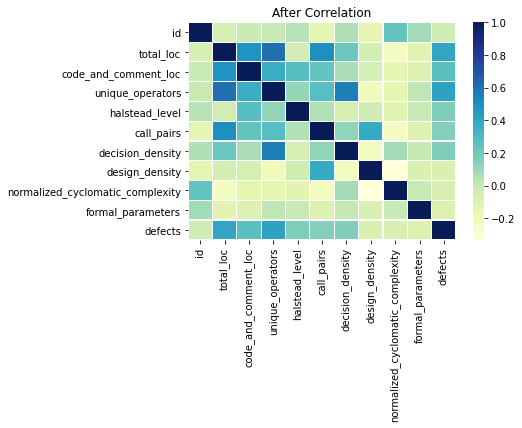

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


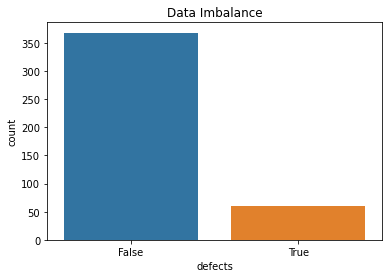

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


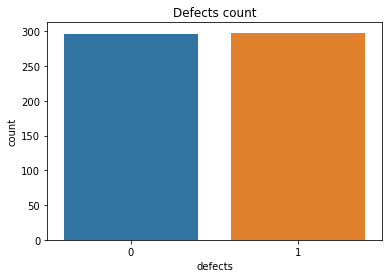

In [44]:
# Datasets AR
# Step 1: Preprocess and Split for Train/Test. 
# Display Before and After Correlation Graph
# Display data imbalance graph
# Display data balanced graph after preprocessing
if pre_process_data(ar_data):
    data, data_X, data_y = pre_process_data(ar_data)
    combined_training_data, X_train1, X_train2, X_train, ar_X_test, ar_X_val, y_train1, y_train2, y_train, ar_y_test, ar_y_val = split_data_train_test(data_X, data_y)
else:
    print('No Data available for training')

In [45]:
# Step 2: Model train with Neural Network
neural_network('ar_nn', ar_X_val, ar_y_val)

Epoch 1/100
19/19 [==============================] - 0s 7ms/step - loss: 3.9022 - accuracy: 0.4865 - val_loss: 3.3876 - val_accuracy: 0.4242
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 1.4485 - accuracy: 0.6162 - val_loss: 1.3587 - val_accuracy: 0.5758
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.8270 - accuracy: 0.6498 - val_loss: 1.0612 - val_accuracy: 0.6818
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6987 - accuracy: 0.6667 - val_loss: 0.8234 - val_accuracy: 0.7121
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.6364 - val_loss: 0.8002 - val_accuracy: 0.6818
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.6212 - val_loss: 0.7356 - val_accuracy: 0.6970
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6502 - accuracy: 0.6229 - val_loss: 0.7090 - val_accuracy: 0.6970
Epoch 8/100
1

Epoch 59/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6118 - accuracy: 0.6700 - val_loss: 0.6464 - val_accuracy: 0.6970
Epoch 60/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5831 - accuracy: 0.6768 - val_loss: 0.7922 - val_accuracy: 0.6515
Epoch 61/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6142 - accuracy: 0.6650 - val_loss: 0.7265 - val_accuracy: 0.6667
Epoch 62/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.6768 - val_loss: 0.6366 - val_accuracy: 0.6970
Epoch 63/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5792 - accuracy: 0.6835 - val_loss: 0.7281 - val_accuracy: 0.6364
Epoch 64/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5872 - accuracy: 0.6801 - val_loss: 0.6500 - val_accuracy: 0.6667
Epoch 65/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5889 - accuracy: 0.6717 - val_loss: 0.7346 - val_accuracy: 0.6667
Epoch 

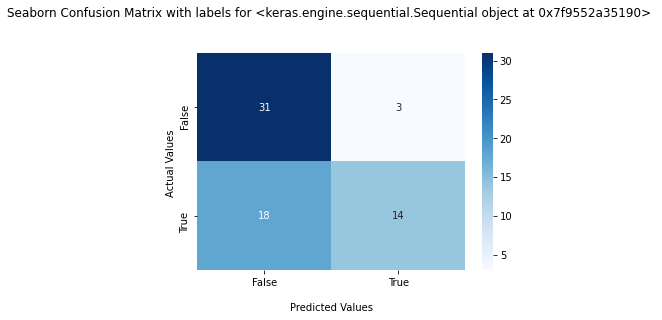

Accuracy of Model:  0.6818181818181818
Test Accuracy or Neural Network 0.6818181818181818


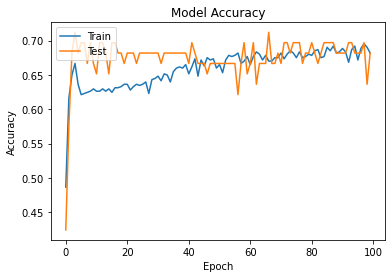

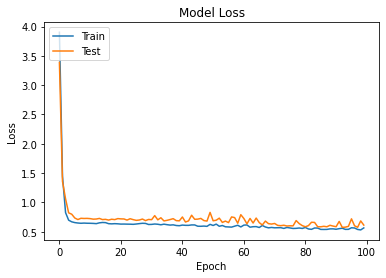

In [46]:
# Step 3: 
# Display Confusion Matrix
# Display Test Result of NN
# Display Model Accuracy graph
# Display Model Loss graph
ar_nn_history = history
test_nn_model('ar_nn', ar_X_val, ar_y_val)
plot_loss_accuracy_graph(ar_nn_history)

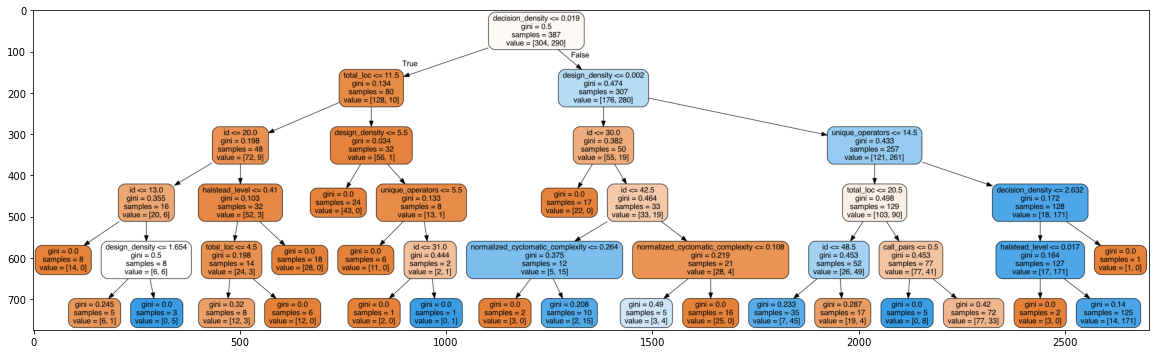

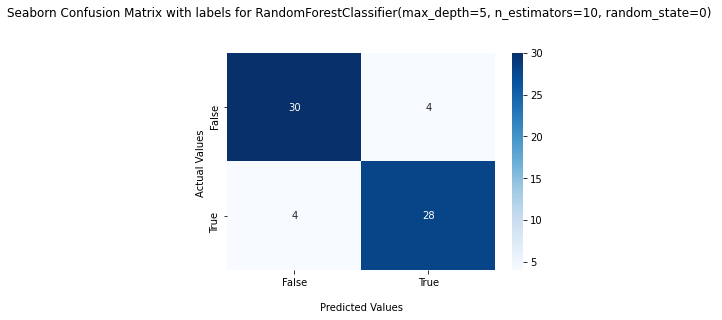

Accuracy of Model:  0.8787878787878788
Test Accuracy of Random Forest 0.8787878787878788


In [47]:
# Step 4:
# Model train with Random Forest
# Display hierarchical graph
# Display Confusion Matrix
# Test Result of RF
random_forest('ar_rf')
display_tree('ar_rf')
test_rf_model('ar_rf', ar_X_val, ar_y_val)

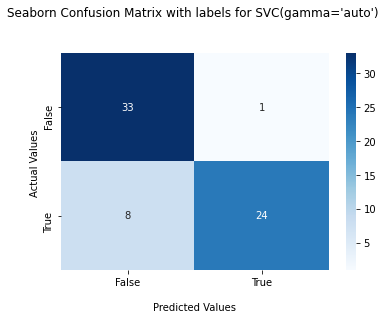

Accuracy of Model:  0.8636363636363636
Test Accuracy of SVC 0.8636363636363636


In [48]:
# Step 5:
# Model train with Support Vector Machine
# Display Confusion Matrix
# Display Test Result of SVM
svm('ar_svm')
test_svm_model('ar_svm', ar_X_val, ar_y_val)

In [49]:
# Step 6: Model train with Convolutional Neural Network
cnn('ar_cnn', ar_X_val, ar_y_val)

Epoch 1/100
19/19 [==============================] - 1s 8ms/step - loss: 0.6316 - accuracy: 0.6178 - val_loss: 0.5825 - val_accuracy: 0.6364
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5912 - accuracy: 0.6515 - val_loss: 0.5839 - val_accuracy: 0.6818
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5735 - accuracy: 0.6650 - val_loss: 0.5823 - val_accuracy: 0.7121
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5622 - accuracy: 0.7003 - val_loss: 0.5888 - val_accuracy: 0.6818
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5595 - accuracy: 0.7088 - val_loss: 0.5786 - val_accuracy: 0.7121
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5519 - accuracy: 0.7104 - val_loss: 0.6137 - val_accuracy: 0.7424
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5416 - accuracy: 0.7189 - val_loss: 0.5689 - val_accuracy: 0.6970
Epoch 8/100
1

Epoch 59/100
19/19 [==============================] - 0s 3ms/step - loss: 0.3812 - accuracy: 0.8114 - val_loss: 0.5127 - val_accuracy: 0.7727
Epoch 60/100
19/19 [==============================] - 0s 2ms/step - loss: 0.3796 - accuracy: 0.8182 - val_loss: 0.5166 - val_accuracy: 0.7727
Epoch 61/100
19/19 [==============================] - 0s 2ms/step - loss: 0.3941 - accuracy: 0.8098 - val_loss: 0.5480 - val_accuracy: 0.8182
Epoch 62/100
19/19 [==============================] - 0s 2ms/step - loss: 0.3804 - accuracy: 0.8182 - val_loss: 0.5322 - val_accuracy: 0.7879
Epoch 63/100
19/19 [==============================] - 0s 2ms/step - loss: 0.3701 - accuracy: 0.8249 - val_loss: 0.5713 - val_accuracy: 0.8182
Epoch 64/100
19/19 [==============================] - 0s 2ms/step - loss: 0.3900 - accuracy: 0.7997 - val_loss: 0.5490 - val_accuracy: 0.8333
Epoch 65/100
19/19 [==============================] - 0s 3ms/step - loss: 0.3764 - accuracy: 0.8350 - val_loss: 0.4972 - val_accuracy: 0.7424
Epoch 

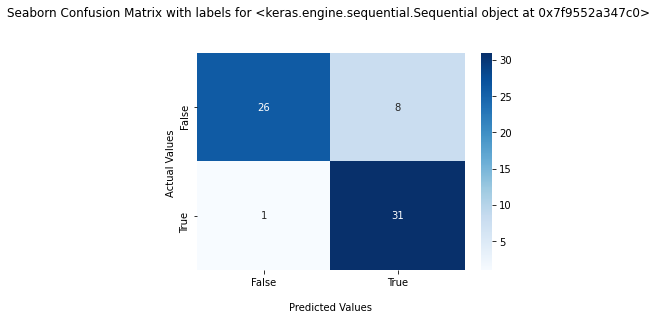

Accuracy of Model:  0.8636363636363636
Test Accuracy of CNN 0.8636363636363636


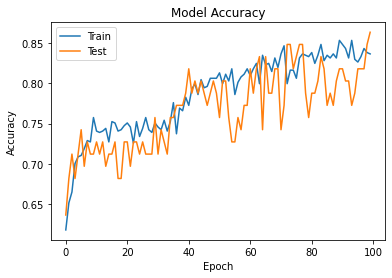

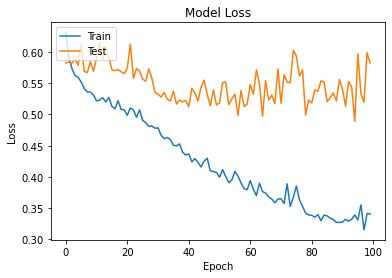

In [50]:
# Step 7: 
# Display Confusion Matrix
# Display Test Result of CNN
# Display Model Accuracy graph
# Display Model Loss graph
ar_X_Val1 = X_val1
ar_cnn_history = history
test_cnn_model('ar_cnn', ar_X_Val1, ar_y_val)
plot_loss_accuracy_graph(ar_cnn_history)

In [51]:
# Step 8:
# Model train with Logistic Regression
# Model train with Ada Boosting
# Model Train with Bagging

# Step 9:
# Test Result for Logistic Regression
# Test Result for Ada Boosting
# Test Result for Bagging
# Ensemble Learning for AR Datasets
new_val_set_X_matrix, new_val_set_y_matrix, new_test_set_X_matrix, new_test_set_y_matrix = prepare_for_ensemble_learning('ar', ar_X_val, ar_X_test, ar_y_val, ar_y_test)
# Ensemble Training
print("***********************************************************")
ensemble_logistic_regression_train('ar')
ensemble_ada_boost_train('ar')
ensemble_bagging_train('ar')
print("***********************************************************")

# Ensemble Testing
print("***********************************************************")
ensemble_logistic_regresstion_test('ar', new_test_set_X_matrix, ar_y_test)
ensemble_ada_boost_test('ar', new_test_set_X_matrix, ar_y_test)
ensemble_bagging_test('ar', new_test_set_X_matrix, ar_y_test)
print("***********************************************************")

***************** AR Dataset SVC(gamma='auto') *********************
*****Validation Set*****
Accuracy: 0.8602941176470589
Avg Precision: 0.8412121212121212
Precision: 0.96
Recall: 0.75
************************
*****Test Set*****
Accuracy: 0.47368421052631576
Avg Precision: 0.11627906976744186
Precision: 0.0
Recall: 0.0
************************

***************** AR Dataset RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0) *********************
*****Validation Set*****
Accuracy: 0.8786764705882353
Avg Precision: 0.8262310606060606
Precision: 0.875
Recall: 0.875
************************
*****Test Set*****
Accuracy: 0.5342105263157895
Avg Precision: 0.1263565891472868
Precision: 0.16666666666666666
Recall: 0.2
************************

***************** AR Dataset <keras.engine.sequential.Sequential object at 0x7f9552ca9df0> *********************
*****Validation Set*****
Accuracy: 0.6746323529411764
Avg Precision: 0.6330213903743316
Precision: 0.8235294117647058
Recall

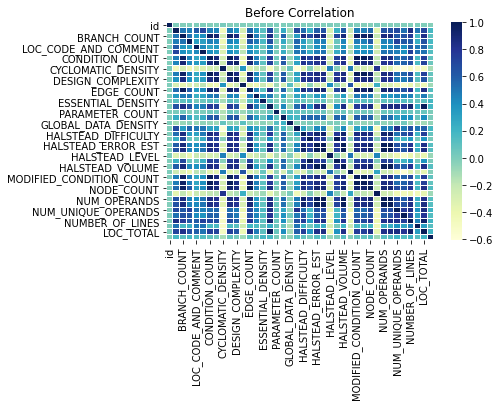

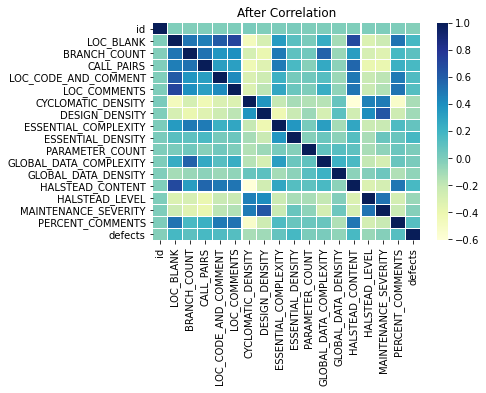

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


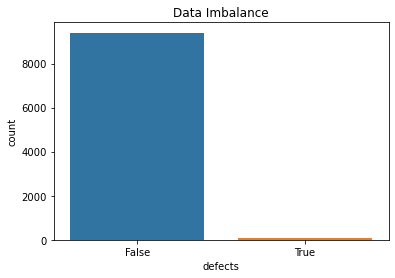

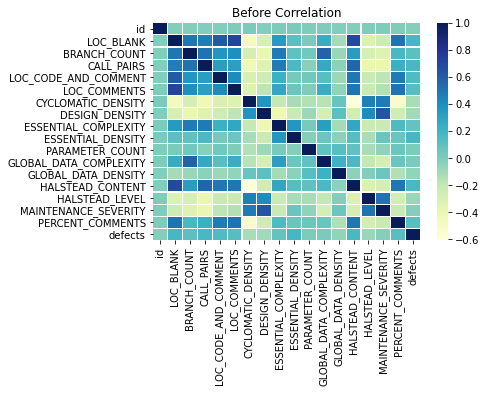

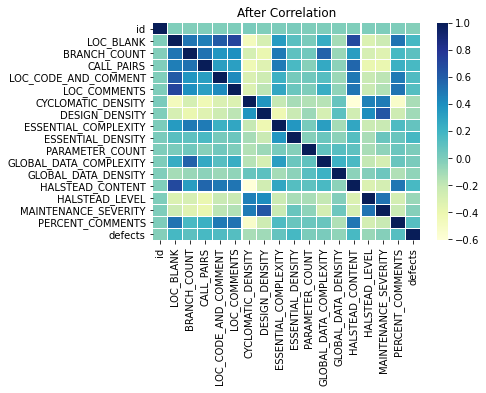

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


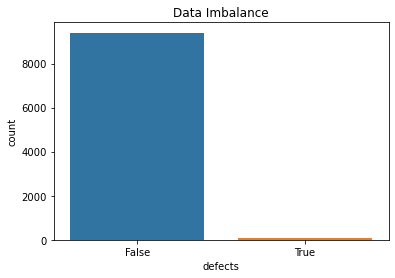

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


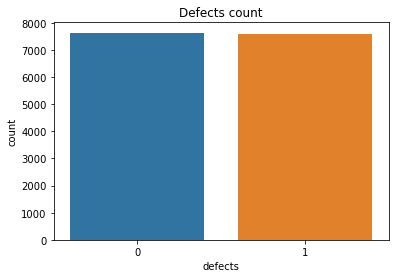

In [52]:
# Datasets MC
# Step 1: Preprocess and Split for Train/Test. 
# Display Before and After Correlation Graph
# Display data imbalance graph
# Display data balanced graph after preprocessing
if pre_process_data(mc_data):
    data, data_X, data_y = pre_process_data(mc_data)
    combined_training_data, X_train1, X_train2, X_train, mc_X_test, mc_X_val, y_train1, y_train2, y_train, mc_y_test, mc_y_val = split_data_train_test(data_X, data_y)
else:
    print('No Data available for training')

In [53]:
# Step 2: Model train with Neural Network
neural_network('mc_nn', mc_X_val, mc_y_val)

Epoch 1/100
476/476 [==============================] - 1s 1ms/step - loss: 57.6309 - accuracy: 0.7169 - val_loss: 0.3808 - val_accuracy: 0.9066
Epoch 2/100
476/476 [==============================] - 1s 1ms/step - loss: 0.4878 - accuracy: 0.8514 - val_loss: 0.2813 - val_accuracy: 0.8960
Epoch 3/100
476/476 [==============================] - 0s 915us/step - loss: 0.4996 - accuracy: 0.8592 - val_loss: 0.2727 - val_accuracy: 0.9297
Epoch 4/100
476/476 [==============================] - 0s 860us/step - loss: 0.4315 - accuracy: 0.8663 - val_loss: 0.3962 - val_accuracy: 0.9102
Epoch 5/100
476/476 [==============================] - 0s 866us/step - loss: 0.3476 - accuracy: 0.8875 - val_loss: 0.2053 - val_accuracy: 0.9297
Epoch 6/100
476/476 [==============================] - 0s 884us/step - loss: 0.3536 - accuracy: 0.8881 - val_loss: 0.9019 - val_accuracy: 0.7600
Epoch 7/100
476/476 [==============================] - 0s 836us/step - loss: 0.4050 - accuracy: 0.8782 - val_loss: 0.2161 - val_accur

476/476 [==============================] - 0s 853us/step - loss: 0.1860 - accuracy: 0.9351 - val_loss: 0.1549 - val_accuracy: 0.9498
Epoch 58/100
476/476 [==============================] - 0s 867us/step - loss: 0.1772 - accuracy: 0.9379 - val_loss: 0.1556 - val_accuracy: 0.9527
Epoch 59/100
476/476 [==============================] - 0s 848us/step - loss: 0.1774 - accuracy: 0.9384 - val_loss: 0.1594 - val_accuracy: 0.9468
Epoch 60/100
476/476 [==============================] - 0s 844us/step - loss: 0.1729 - accuracy: 0.9387 - val_loss: 0.2590 - val_accuracy: 0.9007
Epoch 61/100
476/476 [==============================] - 0s 845us/step - loss: 0.1801 - accuracy: 0.9380 - val_loss: 0.1710 - val_accuracy: 0.9509
Epoch 62/100
476/476 [==============================] - 0s 830us/step - loss: 0.1698 - accuracy: 0.9392 - val_loss: 0.1660 - val_accuracy: 0.9521
Epoch 63/100
476/476 [==============================] - 0s 857us/step - loss: 0.1815 - accuracy: 0.9335 - val_loss: 0.1740 - val_accuracy

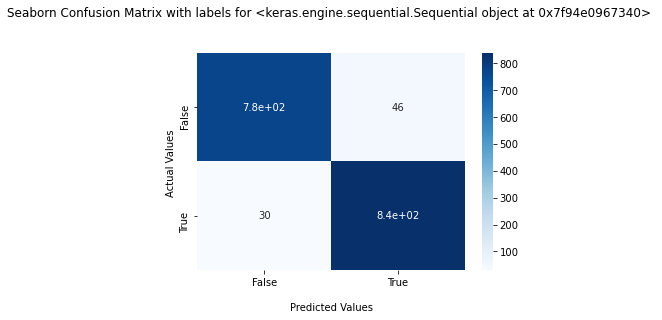

Accuracy of Model:  0.9550827423167849
Test Accuracy or Neural Network 0.9550827423167849


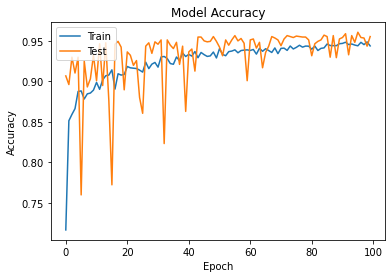

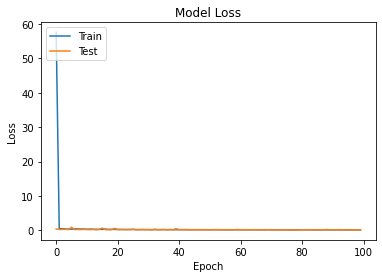

In [54]:
# Step 3: 
# Display Confusion Matrix
# Display Test Result of NN
# Display Model Accuracy graph
# Display Model Loss graph
mc_nn_history = history
test_nn_model('mc_nn', mc_X_val, mc_y_val)
plot_loss_accuracy_graph(mc_nn_history)

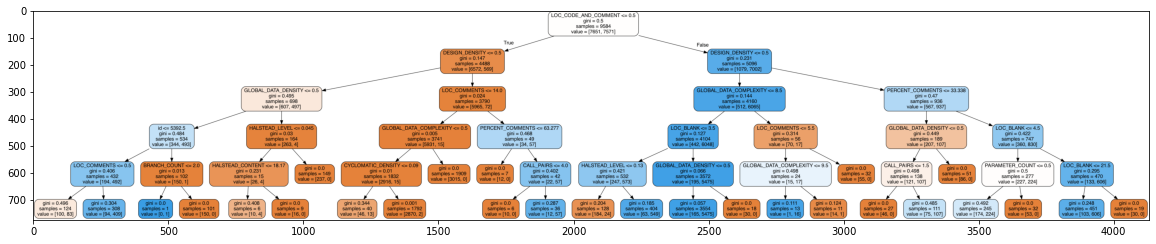

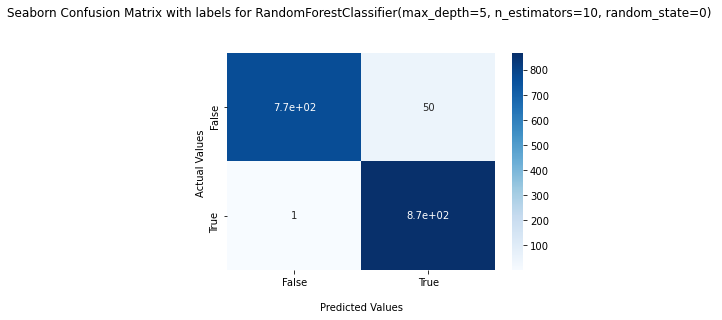

Accuracy of Model:  0.9698581560283688
Test Accuracy of Random Forest 0.9698581560283688


In [55]:
# Step 4:
# Model train with Random Forest
# Display hierarchical graph
# Display Confusion Matrix
# Test Result of RF
random_forest('mc_rf')
display_tree('mc_rf')
test_rf_model('mc_rf', mc_X_val, mc_y_val)

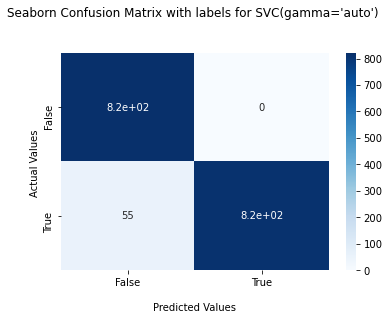

Accuracy of Model:  0.9674940898345153
Test Accuracy of SVC 0.9674940898345153


In [56]:
# Step 5:
# Model train with Support Vector Machine
# Display Confusion Matrix
# Display Test Result of SVM
svm('mc_svm')
test_svm_model('mc_svm', mc_X_val, mc_y_val)

In [57]:
# Step 6: Model train with Convolutional Neural Network
cnn('mc_cnn', mc_X_val, mc_y_val)

Epoch 1/100
476/476 [==============================] - 1s 1ms/step - loss: 1.3849 - accuracy: 0.8331 - val_loss: 0.2543 - val_accuracy: 0.9084
Epoch 2/100
476/476 [==============================] - 1s 1ms/step - loss: 0.2540 - accuracy: 0.9076 - val_loss: 0.1948 - val_accuracy: 0.9232
Epoch 3/100
476/476 [==============================] - 1s 1ms/step - loss: 0.1903 - accuracy: 0.9275 - val_loss: 0.1490 - val_accuracy: 0.9444
Epoch 4/100
476/476 [==============================] - 1s 1ms/step - loss: 0.1868 - accuracy: 0.9294 - val_loss: 0.2061 - val_accuracy: 0.9344
Epoch 5/100
476/476 [==============================] - 1s 1ms/step - loss: 0.1821 - accuracy: 0.9339 - val_loss: 0.1431 - val_accuracy: 0.9533
Epoch 6/100
476/476 [==============================] - 1s 1ms/step - loss: 0.1700 - accuracy: 0.9388 - val_loss: 0.1635 - val_accuracy: 0.9427
Epoch 7/100
476/476 [==============================] - 1s 1ms/step - loss: 0.1585 - accuracy: 0.9426 - val_loss: 0.1495 - val_accuracy: 0.9539

Epoch 58/100
476/476 [==============================] - 1s 1ms/step - loss: 0.0475 - accuracy: 0.9854 - val_loss: 0.0458 - val_accuracy: 0.9864
Epoch 59/100
476/476 [==============================] - 1s 1ms/step - loss: 0.0442 - accuracy: 0.9867 - val_loss: 0.0385 - val_accuracy: 0.9900
Epoch 60/100
476/476 [==============================] - 1s 1ms/step - loss: 0.0450 - accuracy: 0.9850 - val_loss: 0.0370 - val_accuracy: 0.9929
Epoch 61/100
476/476 [==============================] - 1s 1ms/step - loss: 0.0422 - accuracy: 0.9867 - val_loss: 0.0351 - val_accuracy: 0.9905
Epoch 62/100
476/476 [==============================] - 1s 1ms/step - loss: 0.0439 - accuracy: 0.9858 - val_loss: 0.0447 - val_accuracy: 0.9876
Epoch 63/100
476/476 [==============================] - 1s 1ms/step - loss: 0.0442 - accuracy: 0.9854 - val_loss: 0.0321 - val_accuracy: 0.9900
Epoch 64/100
476/476 [==============================] - 1s 1ms/step - loss: 0.0423 - accuracy: 0.9869 - val_loss: 0.0352 - val_accuracy:

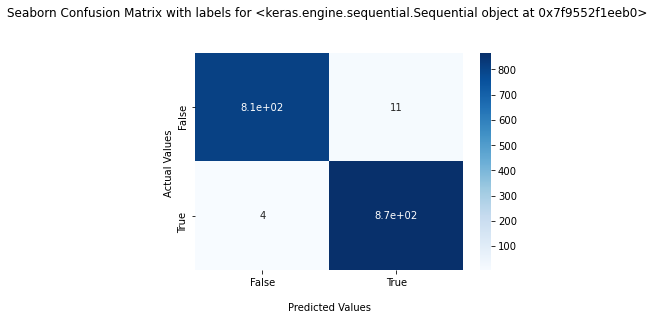

Accuracy of Model:  0.9911347517730497
Test Accuracy of CNN 0.9911347517730497


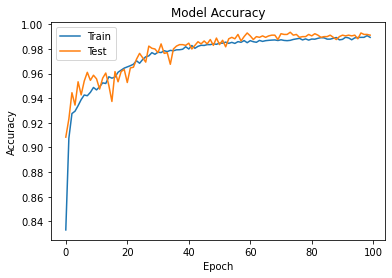

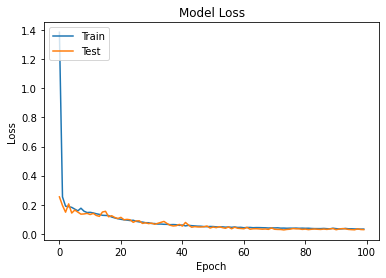

In [58]:
# Step 7: 
# Display Confusion Matrix
# Display Test Result of CNN
# Display Model Accuracy graph
# Display Model Loss graph
mc_X_Val1 = X_val1
mc_cnn_history = history
test_cnn_model('mc_cnn', mc_X_Val1, mc_y_val)
plot_loss_accuracy_graph(mc_cnn_history)

In [59]:
# Step 8:
# Model train with Logistic Regression
# Model train with Ada Boosting
# Model Train with Bagging

# Step 9:
# Test Result for Logistic Regression
# Test Result for Ada Boosting
# Test Result for Bagging
# Ensemble Learning for MC Datasets
new_val_set_X_matrix, new_val_set_y_matrix, new_test_set_X_matrix, new_test_set_y_matrix = prepare_for_ensemble_learning('mc', mc_X_val, mc_X_test, mc_y_val, mc_y_test)
# Ensemble Training
print("***********************************************************")
ensemble_logistic_regression_train('mc')
ensemble_ada_boost_train('mc')
ensemble_bagging_train('mc')
print("***********************************************************")

# Ensemble Testing
print("***********************************************************")
ensemble_logistic_regresstion_test('mc', new_test_set_X_matrix, mc_y_test)
ensemble_ada_boost_test('mc', new_test_set_X_matrix, mc_y_test)
ensemble_bagging_test('mc', new_test_set_X_matrix, mc_y_test)
print("***********************************************************")

***************** MC Dataset SVC(gamma='auto') *********************
*****Validation Set*****
Accuracy: 0.9683908045977012
Avg Precision: 0.969287519360887
Precision: 1.0
Recall: 0.9367816091954023
************************
*****Test Set*****
Accuracy: 0.5
Avg Precision: 0.006335797254487857
Precision: 0.0
Recall: 0.0
************************

***************** MC Dataset RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0) *********************
*****Validation Set*****
Accuracy: 0.9690116620521856
Avg Precision: 0.9450971639100384
Precision: 0.9455930359085963
Recall: 0.9988505747126437
************************
*****Test Set*****
Accuracy: 0.7117428267800212
Avg Precision: 0.02316789862724393
Precision: 0.04
Recall: 0.5
************************

***************** MC Dataset <keras.engine.sequential.Sequential object at 0x7f95535c9760> *********************
*****Validation Set*****
Accuracy: 0.9547780854098498
Avg Precision: 0.9331193031792062
Precision: 0.94808126410835

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***************** MC Dataset <keras.engine.sequential.Sequential object at 0x7f9541938ac0> *********************
*****Validation Set*****
Accuracy: 0.9910101518583774
Avg Precision: 0.9852812734967015
Precision: 0.9874572405929305
Recall: 0.9954022988505747
************************
*****Test Set*****
Accuracy: 0.7404357066950054
Avg Precision: 0.07459647005581535
Precision: 0.14285714285714285
Recall: 0.5
************************

***********************************************************
***********************************************************
***********************************************************
MC Logistic Regression Accuracy: 0.9788806758183738
MC Ada Boost Accuracy: 0.9355860612460402
MC Bagging Accuracy: 0.9809926082365364
***********************************************************


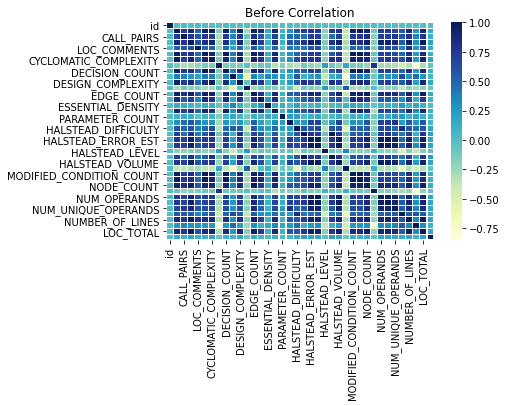

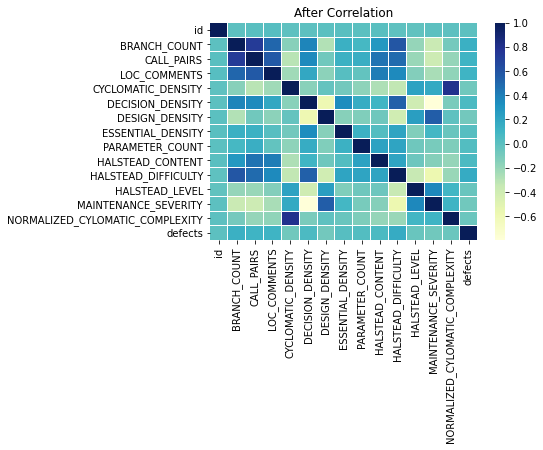

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


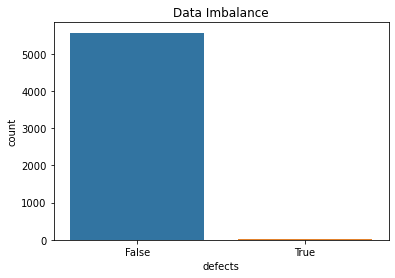

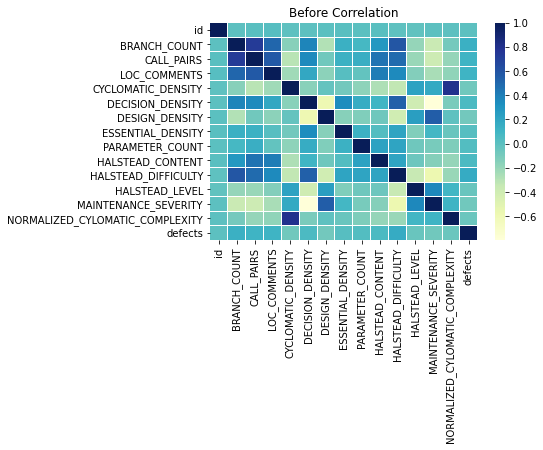

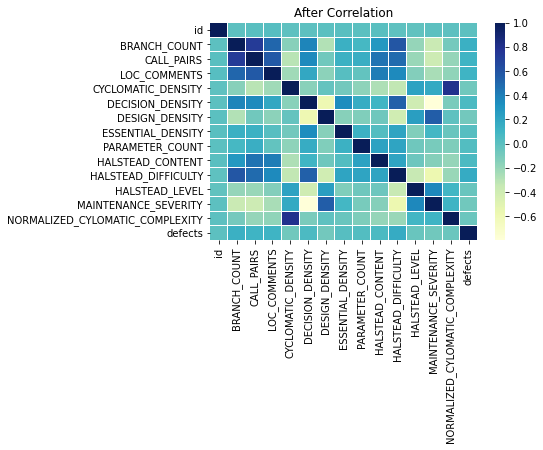

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


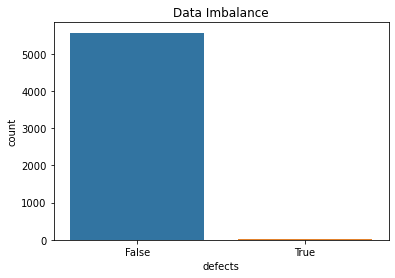

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


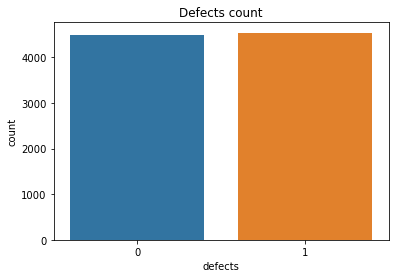

In [60]:
# Datasets PC
# Step 1: Preprocess and Split for Train/Test. 
# Display Before and After Correlation Graph
# Display data imbalance graph
# Display data balanced graph after preprocessing
if pre_process_data(pc_data):
    data, data_X, data_y = pre_process_data(pc_data)
    combined_training_data, X_train1, X_train2, X_train, pc_X_test, pc_X_val, y_train1, y_train2, y_train, pc_y_test, pc_y_val = split_data_train_test(data_X, data_y)
else:
    print('No Data available for training')

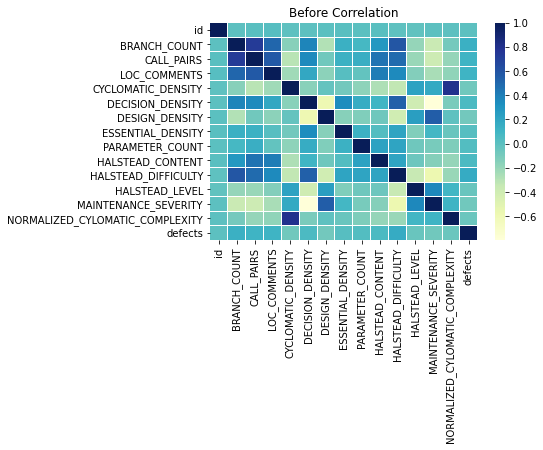

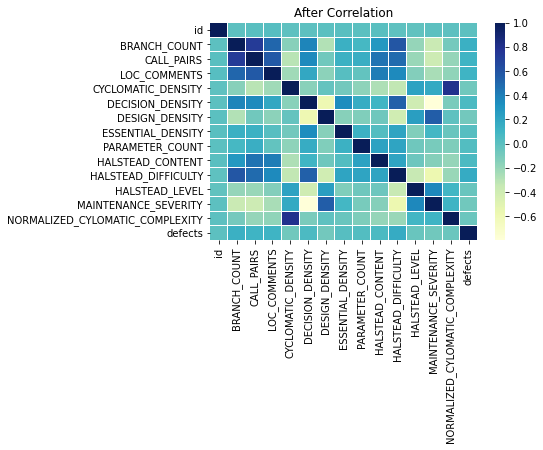

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


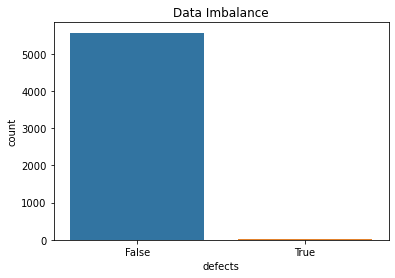

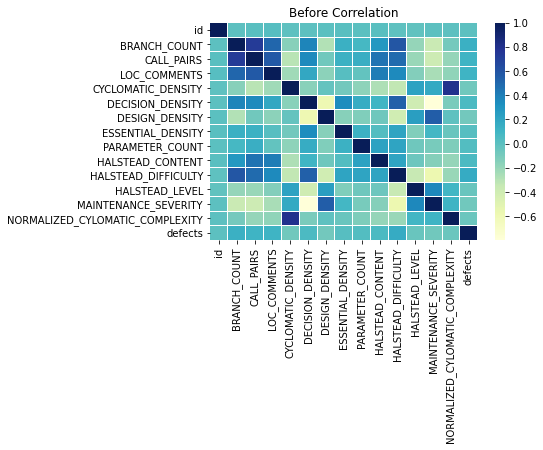

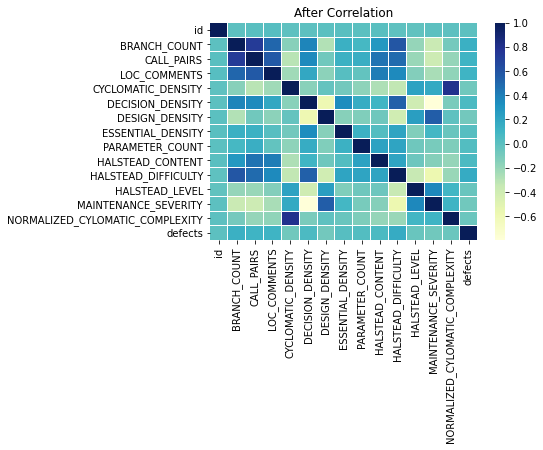

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


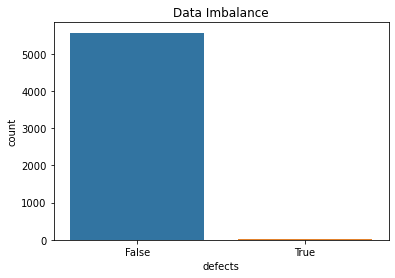

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


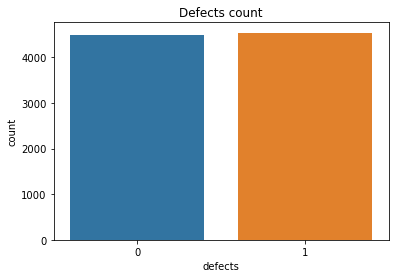

In [61]:
if pre_process_data(pc_data):
    data, data_X, data_y = pre_process_data(pc_data)
    combined_training_data, X_train1, X_train2, X_train, pc_X_test, pc_X_val, y_train1, y_train2, y_train, pc_y_test, pc_y_val = split_data_train_test(data_X, data_y)
else:
    print('No Data available for training')

In [62]:
# Step 2: Model train with Neural Network
neural_network('pc_nn', pc_X_val, pc_y_val)

Epoch 1/100
282/282 [==============================] - 1s 1ms/step - loss: 23.5820 - accuracy: 0.7374 - val_loss: 0.4560 - val_accuracy: 0.8664
Epoch 2/100
282/282 [==============================] - 0s 852us/step - loss: 0.4693 - accuracy: 0.8638 - val_loss: 0.3993 - val_accuracy: 0.9103
Epoch 3/100
282/282 [==============================] - 0s 868us/step - loss: 0.4675 - accuracy: 0.8513 - val_loss: 0.3749 - val_accuracy: 0.9073
Epoch 4/100
282/282 [==============================] - 0s 898us/step - loss: 0.4328 - accuracy: 0.8590 - val_loss: 0.3028 - val_accuracy: 0.9252
Epoch 5/100
282/282 [==============================] - 0s 878us/step - loss: 0.4445 - accuracy: 0.8547 - val_loss: 0.2851 - val_accuracy: 0.9272
Epoch 6/100
282/282 [==============================] - 0s 889us/step - loss: 0.4101 - accuracy: 0.8758 - val_loss: 0.5530 - val_accuracy: 0.7836
Epoch 7/100
282/282 [==============================] - 0s 880us/step - loss: 0.3809 - accuracy: 0.8723 - val_loss: 0.4108 - val_acc

282/282 [==============================] - 0s 862us/step - loss: 0.2636 - accuracy: 0.9283 - val_loss: 0.3459 - val_accuracy: 0.8943
Epoch 58/100
282/282 [==============================] - 0s 869us/step - loss: 0.2725 - accuracy: 0.9281 - val_loss: 0.3038 - val_accuracy: 0.9003
Epoch 59/100
282/282 [==============================] - 0s 929us/step - loss: 0.1766 - accuracy: 0.9493 - val_loss: 0.2032 - val_accuracy: 0.9472
Epoch 60/100
282/282 [==============================] - 0s 930us/step - loss: 0.2061 - accuracy: 0.9406 - val_loss: 0.1714 - val_accuracy: 0.9352
Epoch 61/100
282/282 [==============================] - 0s 882us/step - loss: 0.1645 - accuracy: 0.9516 - val_loss: 0.2917 - val_accuracy: 0.8983
Epoch 62/100
282/282 [==============================] - 0s 918us/step - loss: 0.1587 - accuracy: 0.9543 - val_loss: 0.1341 - val_accuracy: 0.9591
Epoch 63/100
282/282 [==============================] - 0s 873us/step - loss: 0.1917 - accuracy: 0.9431 - val_loss: 0.1125 - val_accuracy

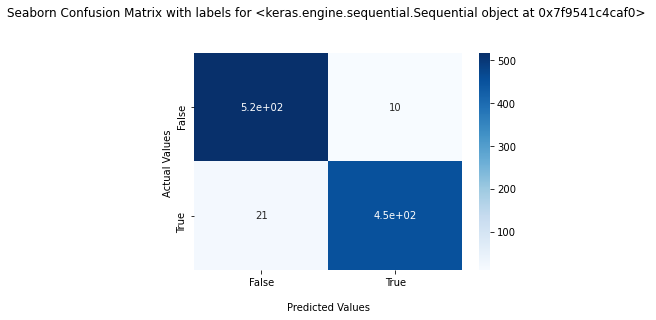

Accuracy of Model:  0.9690927218344965
Test Accuracy or Neural Network 0.9690927218344965


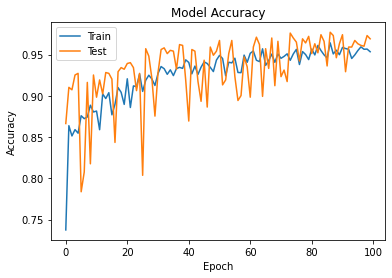

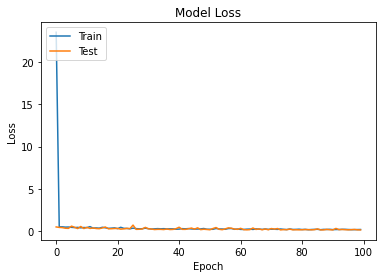

In [63]:
# Step 3: 
# Display Confusion Matrix
# Display Test Result of NN
# Display Model Accuracy graph
# Display Model Loss graph
pc_nn_history = history
test_nn_model('pc_nn', pc_X_val, pc_y_val)
plot_loss_accuracy_graph(pc_nn_history)

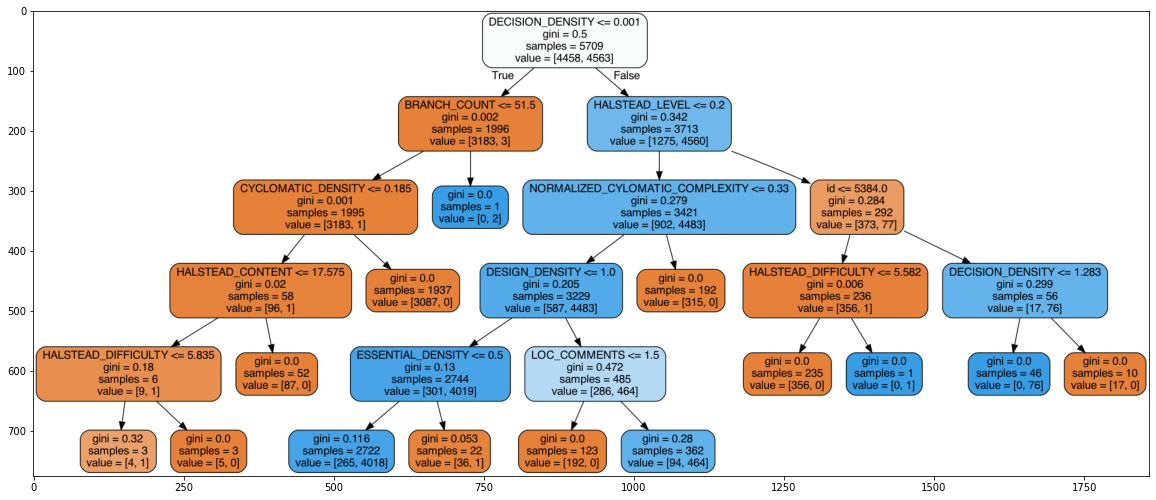

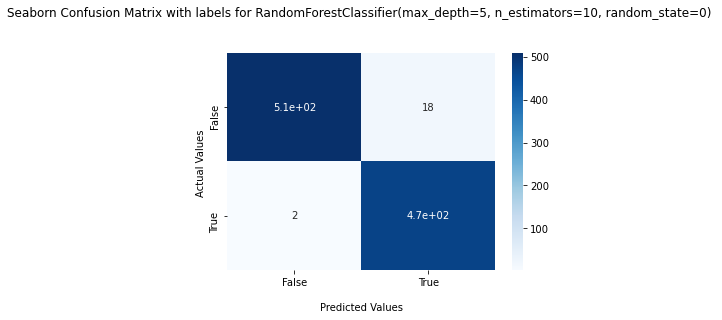

Accuracy of Model:  0.9800598205383848
Test Accuracy of Random Forest 0.9800598205383848


In [64]:
# Step 4:
# Model train with Random Forest
# Display hierarchical graph
# Display Confusion Matrix
# Test Result of RF
random_forest('pc_rf')
display_tree('pc_rf')
test_rf_model('pc_rf', pc_X_val, pc_y_val)

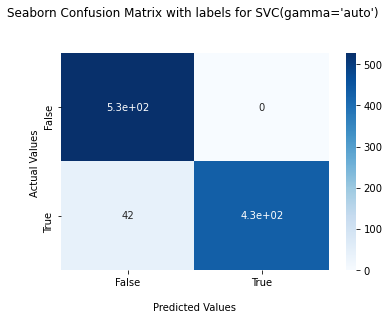

Accuracy of Model:  0.9581256231306082
Test Accuracy of SVC 0.9581256231306082


In [65]:
# Step 5:
# Model train with Support Vector Machine
# Display Confusion Matrix
# Display Test Result of SVM
svm('pc_svm')
test_svm_model('pc_svm', pc_X_val, pc_y_val)

In [66]:
# Step 6: Model train with Convolutional Neural Network
cnn('pc_cnn', pc_X_val, pc_y_val)

Epoch 1/100
282/282 [==============================] - 2s 4ms/step - loss: 0.5415 - accuracy: 0.7688 - val_loss: 0.2554 - val_accuracy: 0.9262
Epoch 2/100
282/282 [==============================] - 1s 4ms/step - loss: 0.3087 - accuracy: 0.8886 - val_loss: 0.2577 - val_accuracy: 0.8943
Epoch 3/100
282/282 [==============================] - 1s 4ms/step - loss: 0.2549 - accuracy: 0.9130 - val_loss: 0.1879 - val_accuracy: 0.9372
Epoch 4/100
282/282 [==============================] - 1s 4ms/step - loss: 0.2222 - accuracy: 0.9292 - val_loss: 0.1727 - val_accuracy: 0.9422
Epoch 5/100
282/282 [==============================] - 1s 4ms/step - loss: 0.2283 - accuracy: 0.9235 - val_loss: 0.3099 - val_accuracy: 0.8893
Epoch 6/100
282/282 [==============================] - 1s 4ms/step - loss: 0.1816 - accuracy: 0.9419 - val_loss: 0.1603 - val_accuracy: 0.9551
Epoch 7/100
282/282 [==============================] - 1s 3ms/step - loss: 0.1801 - accuracy: 0.9418 - val_loss: 0.1572 - val_accuracy: 0.9581

Epoch 58/100
282/282 [==============================] - 1s 3ms/step - loss: 0.0521 - accuracy: 0.9838 - val_loss: 0.0501 - val_accuracy: 0.9840
Epoch 59/100
282/282 [==============================] - 1s 3ms/step - loss: 0.0532 - accuracy: 0.9835 - val_loss: 0.0544 - val_accuracy: 0.9801
Epoch 60/100
282/282 [==============================] - 1s 3ms/step - loss: 0.0532 - accuracy: 0.9830 - val_loss: 0.0516 - val_accuracy: 0.9840
Epoch 61/100
282/282 [==============================] - 1s 3ms/step - loss: 0.0525 - accuracy: 0.9836 - val_loss: 0.0610 - val_accuracy: 0.9821
Epoch 62/100
282/282 [==============================] - 1s 3ms/step - loss: 0.0505 - accuracy: 0.9850 - val_loss: 0.1168 - val_accuracy: 0.9721
Epoch 63/100
282/282 [==============================] - 1s 3ms/step - loss: 0.0504 - accuracy: 0.9848 - val_loss: 0.0414 - val_accuracy: 0.9860
Epoch 64/100
282/282 [==============================] - 1s 3ms/step - loss: 0.0557 - accuracy: 0.9829 - val_loss: 0.0503 - val_accuracy:

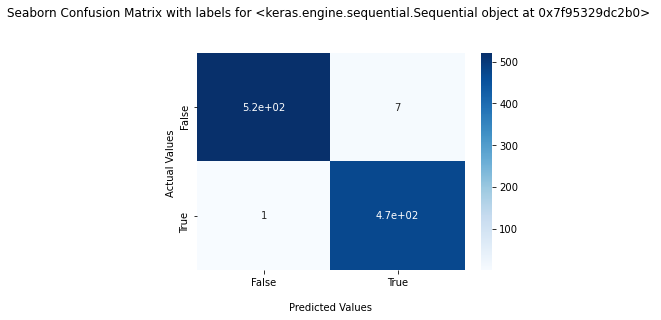

Accuracy of Model:  0.9920239282153539
Test Accuracy of CNN 0.9920239282153539


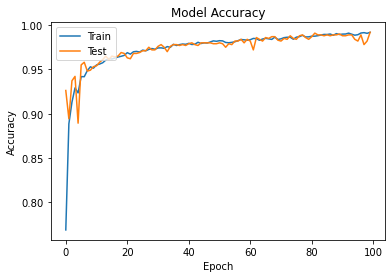

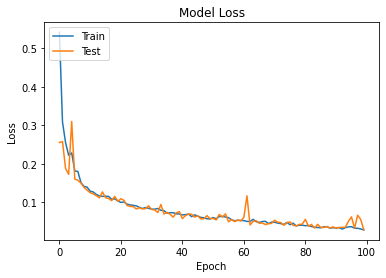

In [67]:
# Step 7: 
# Display Confusion Matrix
# Display Test Result of CNN
# Display Model Accuracy graph
# Display Model Loss graph
pc_X_Val1 = X_val1
pc_cnn_history = history
test_cnn_model('pc_cnn', pc_X_Val1, pc_y_val)
plot_loss_accuracy_graph(pc_cnn_history)

In [68]:
# Step 8:
# Model train with Logistic Regression
# Model train with Ada Boosting
# Model Train with Bagging

# Step 9:
# Test Result for Logistic Regression
# Test Result for Ada Boosting
# Test Result for Bagging
# Ensemble Learning for CM Datasets
new_val_set_X_matrix, new_val_set_y_matrix, new_test_set_X_matrix, new_test_set_y_matrix = prepare_for_ensemble_learning('pc', pc_X_val, pc_X_test, pc_y_val, pc_y_test)
# Ensemble Training
print("***********************************************************")
ensemble_logistic_regression_train('pc')
ensemble_ada_boost_train('pc')
ensemble_bagging_train('pc')
print("***********************************************************")

# Ensemble Testing
print("***********************************************************")
ensemble_logistic_regresstion_test('pc', new_test_set_X_matrix, pc_y_test)
ensemble_ada_boost_test('pc', new_test_set_X_matrix, pc_y_test)
ensemble_bagging_test('pc', new_test_set_X_matrix, pc_y_test)
print("***********************************************************")

***************** PC Dataset SVC(gamma='auto') *********************
*****Validation Set*****
Accuracy: 0.9557894736842105
Avg Precision: 0.9534533242378129
Precision: 1.0
Recall: 0.911578947368421
************************
*****Test Set*****
Accuracy: 0.4990974729241877
Avg Precision: 0.008944543828264758
Precision: 0.0
Recall: 0.0
************************

***************** PC Dataset RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0) *********************
*****Validation Set*****
Accuracy: 0.9808492822966508
Avg Precision: 0.9612779712101769
Precision: 0.9633401221995926
Recall: 0.9957894736842106
************************
*****Test Set*****
Accuracy: 0.6756317689530686
Avg Precision: 0.03295293319351058
Precision: 0.06896551724137931
Recall: 0.4
************************

***************** PC Dataset <keras.engine.sequential.Sequential object at 0x7f9553594e80> *********************
*****Validation Set*****
Accuracy: 0.9684250398724084
Avg Precision: 0.95612775104812

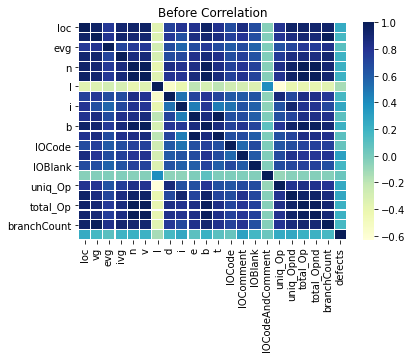

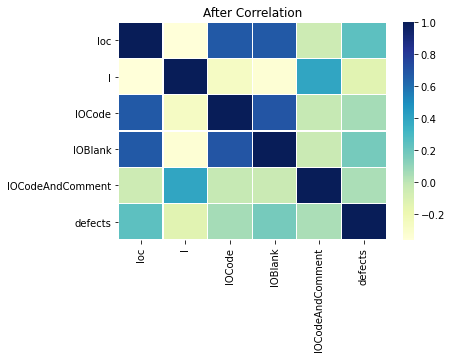

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


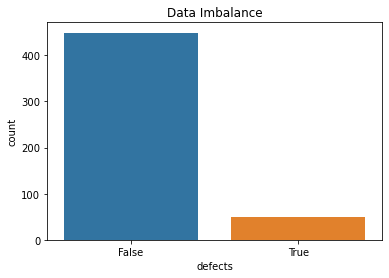

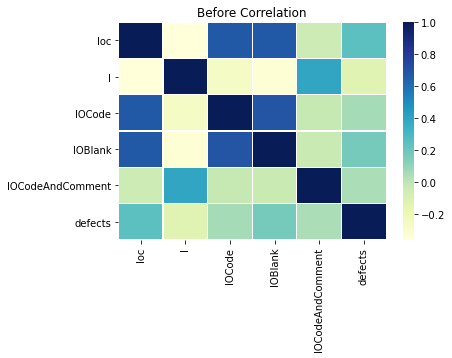

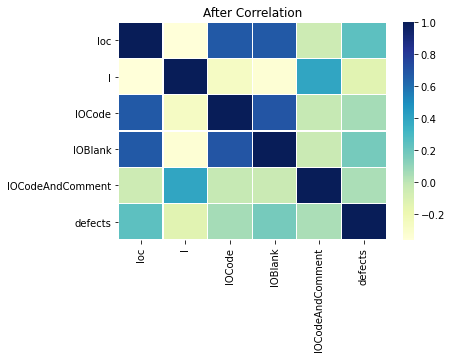

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


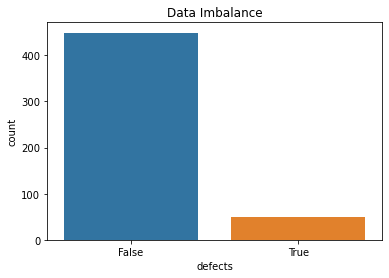

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


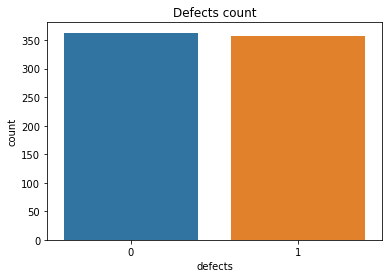

In [69]:
# Datasets CM
# Step 1: Preprocess and Split for Train/Test. 
# Display Before and After Correlation Graph
# Display data imbalance graph
# Display data balanced graph after preprocessing
if pre_process_data(cm_data):
    data, data_X, data_y = pre_process_data(cm_data)
    combined_training_data, X_train1, X_train2, X_train, cm_X_test, cm_X_val, y_train1, y_train2, y_train, cm_y_test, cm_y_val = split_data_train_test(data_X, data_y)
else:
    print('No Data available for training')

In [70]:
# Step 2: Model train with Neural Network
neural_network('cm_nn', cm_X_val, cm_y_val)

Epoch 1/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6599 - accuracy: 0.5903 - val_loss: 0.6067 - val_accuracy: 0.6625
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6243 - accuracy: 0.6514 - val_loss: 0.6006 - val_accuracy: 0.7375
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6148 - accuracy: 0.6944 - val_loss: 0.5786 - val_accuracy: 0.8125
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6081 - accuracy: 0.7319 - val_loss: 0.5666 - val_accuracy: 0.8125
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6011 - accuracy: 0.7444 - val_loss: 0.5648 - val_accuracy: 0.8125
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5969 - accuracy: 0.7417 - val_loss: 0.5561 - val_accuracy: 0.7875
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5926 - accuracy: 0.7347 - val_loss: 0.5661 - val_accuracy: 0.7625
Epoch 8/100
2

Epoch 59/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5084 - accuracy: 0.7306 - val_loss: 0.4866 - val_accuracy: 0.7250
Epoch 60/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5107 - accuracy: 0.7306 - val_loss: 0.5131 - val_accuracy: 0.6750
Epoch 61/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.7264 - val_loss: 0.4885 - val_accuracy: 0.7375
Epoch 62/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5097 - accuracy: 0.7403 - val_loss: 0.4810 - val_accuracy: 0.7375
Epoch 63/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5020 - accuracy: 0.7417 - val_loss: 0.4958 - val_accuracy: 0.7125
Epoch 64/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5009 - accuracy: 0.7319 - val_loss: 0.4816 - val_accuracy: 0.7250
Epoch 65/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5023 - accuracy: 0.7389 - val_loss: 0.4859 - val_accuracy: 0.7375
Epoch 

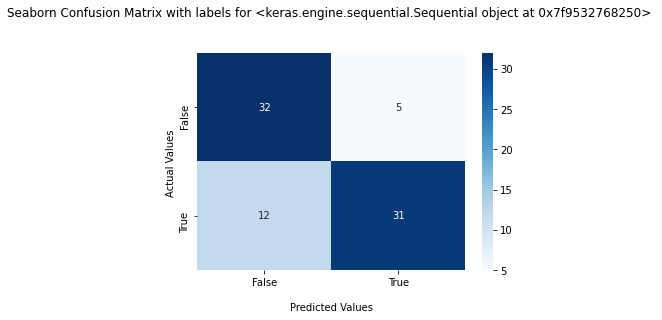

Accuracy of Model:  0.7875
Test Accuracy or Neural Network 0.7875


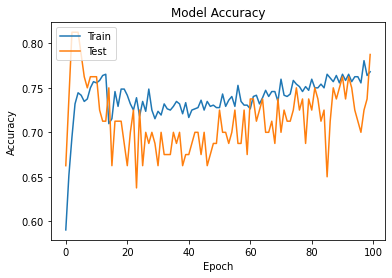

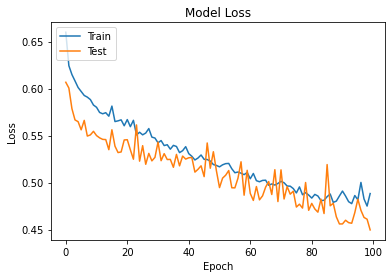

In [71]:
# Step 3: 
# Display Confusion Matrix
# Display Test Result of NN
# Display Model Accuracy graph
# Display Model Loss graph
cm_nn_history = history
test_nn_model('cm_nn', cm_X_val, cm_y_val)
plot_loss_accuracy_graph(cm_nn_history)

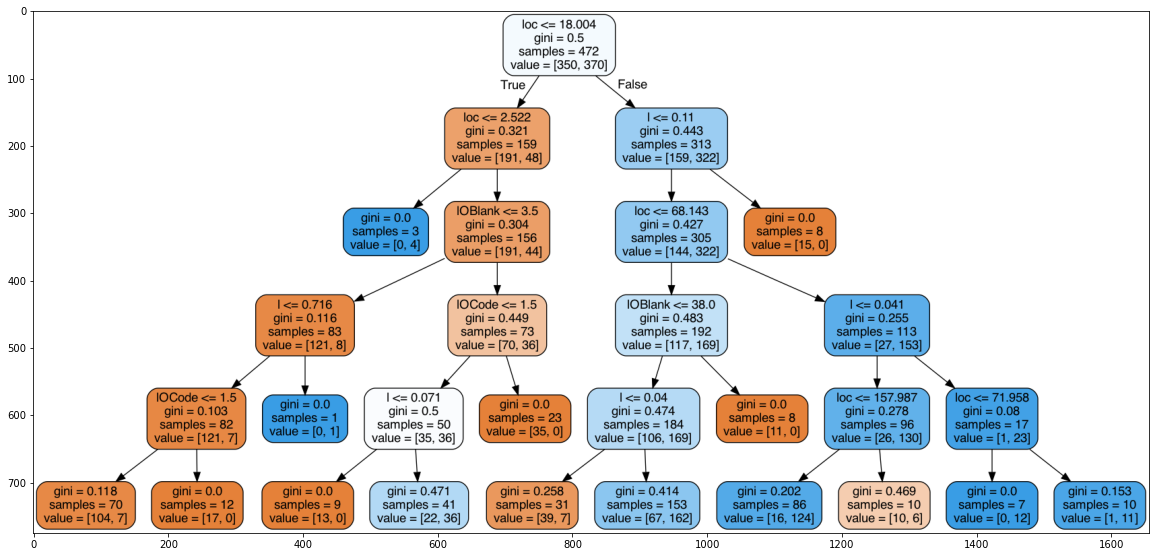

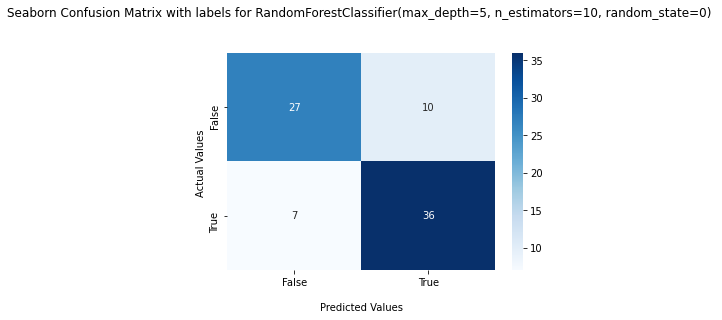

Accuracy of Model:  0.7875
Test Accuracy of Random Forest 0.7875


In [72]:
# Step 4:
# Model train with Random Forest
# Display hierarchical graph
# Display Confusion Matrix
# Test Result of RF
random_forest('cm_rf')
display_tree('cm_rf')
test_rf_model('cm_rf', cm_X_val, cm_y_val)

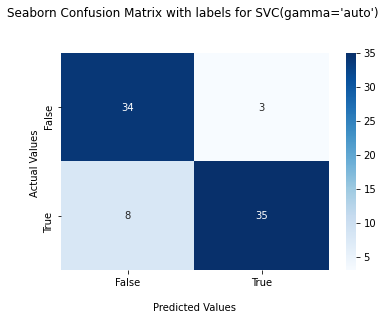

Accuracy of Model:  0.8625
Test Accuracy of SVC 0.8625


In [73]:
# Step 5:
# Model train with Support Vector Machine
# Display Confusion Matrix
# Display Test Result of SVM
svm('cm_svm')
test_svm_model('cm_svm', cm_X_val, cm_y_val)

In [74]:
# Step 6: Model train with Convolutional Neural Network
cnn('cm_cnn', cm_X_val, cm_y_val)

Epoch 1/100
23/23 [==============================] - 1s 9ms/step - loss: 0.9503 - accuracy: 0.4903 - val_loss: 0.6550 - val_accuracy: 0.5875
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6540 - accuracy: 0.5736 - val_loss: 0.6246 - val_accuracy: 0.6750
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6350 - accuracy: 0.6736 - val_loss: 0.6109 - val_accuracy: 0.6875
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6162 - accuracy: 0.6917 - val_loss: 0.5911 - val_accuracy: 0.7000
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6031 - accuracy: 0.7042 - val_loss: 0.5882 - val_accuracy: 0.6375
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5910 - accuracy: 0.7250 - val_loss: 0.5876 - val_accuracy: 0.6375
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5802 - accuracy: 0.7125 - val_loss: 0.5728 - val_accuracy: 0.6500
Epoch 8/100
2

Epoch 59/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4817 - accuracy: 0.7986 - val_loss: 0.4441 - val_accuracy: 0.8375
Epoch 60/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4789 - accuracy: 0.7986 - val_loss: 0.4388 - val_accuracy: 0.8000
Epoch 61/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4784 - accuracy: 0.7972 - val_loss: 0.4411 - val_accuracy: 0.8250
Epoch 62/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4763 - accuracy: 0.7931 - val_loss: 0.4358 - val_accuracy: 0.8250
Epoch 63/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4756 - accuracy: 0.7917 - val_loss: 0.4280 - val_accuracy: 0.8375
Epoch 64/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4749 - accuracy: 0.7861 - val_loss: 0.4433 - val_accuracy: 0.8125
Epoch 65/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4731 - accuracy: 0.7972 - val_loss: 0.4317 - val_accuracy: 0.8375
Epoch 

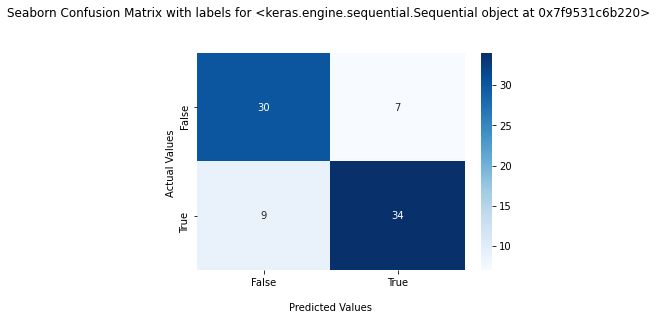

Accuracy of Model:  0.8
Test Accuracy of CNN 0.8


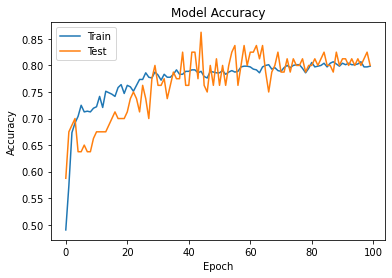

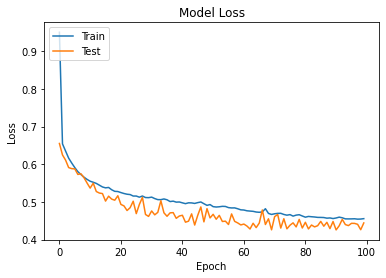

In [75]:
# Step 7: 
# Display Confusion Matrix
# Display Test Result of CNN
# Display Model Accuracy graph
# Display Model Loss graph
cm_X_Val1 = X_val1
cm_cnn_history = history
test_cnn_model('cm_cnn', cm_X_Val1, cm_y_val)
plot_loss_accuracy_graph(cm_cnn_history)

In [76]:
# Step 8:
# Model train with Logistic Regression
# Model train with Ada Boosting
# Model Train with Bagging

# Step 9:
# Test Result for Logistic Regression
# Test Result for Ada Boosting
# Test Result for Bagging
# Ensemble Learning for CM Datasets
new_val_set_X_matrix, new_val_set_y_matrix, new_test_set_X_matrix, new_test_set_y_matrix = prepare_for_ensemble_learning('cm', cm_X_val, cm_X_test, cm_y_val, cm_y_test)
# Ensemble Training
print("***********************************************************")
ensemble_logistic_regression_train('cm')
ensemble_ada_boost_train('cm')
ensemble_bagging_train('cm')
print("***********************************************************")

# Ensemble Testing
print("***********************************************************")
ensemble_logistic_regresstion_test('cm', new_test_set_X_matrix, cm_y_test)
ensemble_ada_boost_test('cm', new_test_set_X_matrix, cm_y_test)
ensemble_bagging_test('cm', new_test_set_X_matrix, cm_y_test)
print("***********************************************************")

***************** CM Dataset SVC(gamma='auto') *********************
*****Validation Set*****
Accuracy: 0.866436203645506
Avg Precision: 0.8496940024479803
Precision: 0.9210526315789473
Recall: 0.813953488372093
************************
*****Test Set*****
Accuracy: 0.9285714285714286
Avg Precision: 0.125
Precision: 0.125
Recall: 1.0
************************

***************** CM Dataset RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0) *********************
*****Validation Set*****
Accuracy: 0.7834695160276556
Avg Precision: 0.7427072800808898
Precision: 0.782608695652174
Recall: 0.8372093023255814
************************
*****Test Set*****
Accuracy: 0.9387755102040816
Avg Precision: 0.14285714285714285
Precision: 0.14285714285714285
Recall: 1.0
************************

***************** CM Dataset <keras.engine.sequential.Sequential object at 0x7f94f0a5cb80> *********************
*****Validation Set*****
Accuracy: 0.7928975487115022
Avg Precision: 0.77080103359173